# Preparation

In [ ]:
# data mining libaries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

# online plotly
#from plotly.plotly import plot, iplot
#plotly.tools.set_credentials_file(username='XXXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXXX')

# offline plotly
from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 42 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

# DATASET ANALYSIS

In [ ]:
# load the dataset
df = pd.read_csv("/content/FinalReport.csv")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# df = df.query('Throughput > 10000')
print("The dataset has %d rows and %d columns" % df.shape)
# Feature Selection
# df = df[['Serving Cell RSRP','Serving Cell Channel RSSI','Throughput UL','RLC Throughput DL (kbps)', 'MAC UL Throughput (kbps)', 'RS SINR Carrier 1', 'Serving Cell RSRQ','Throughput']]

The dataset has 14734 rows and 34 columns


In [ ]:
# df = df [['Serving Cell RSRP','Serving Cell Channel RSSI','Throughput UL','RLC Throughput DL (kbps)', 'MAC UL Throughput (kbps)', 'RS SINR Carrier 1', 'Serving Cell RSRQ','Throughput','PDSCH BLER Carrier 1 (%)','PDCCH Downlink Grant Count Current','PDCCH Uplink Grant Count Current','RLC Throughput UL (kbps)']]

Text(0.5, 1.0, 'Correlation Matrix')

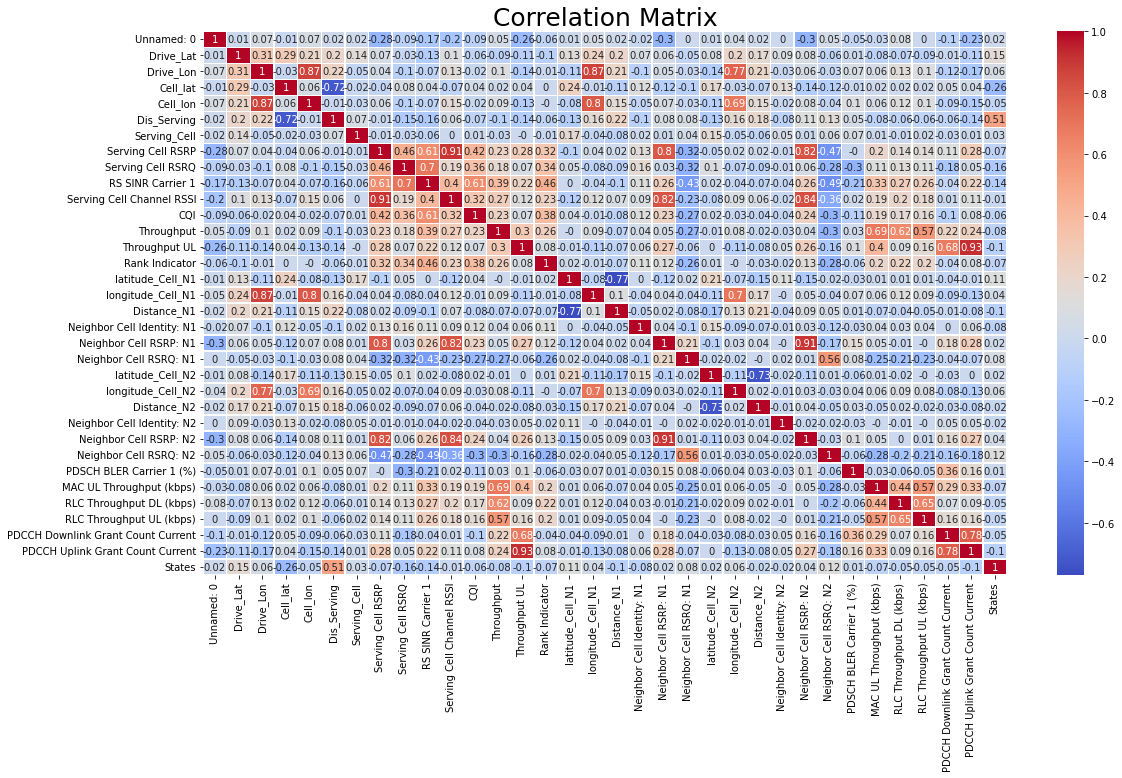

In [ ]:
import seaborn as sns
# Correlation Score
plt.figure(figsize=(18, 10))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap='coolwarm', linewidths=0.3, )
plt.title("Correlation Matrix", size=25)

Text(0.5, 1.0, 'Correlation Matrix')

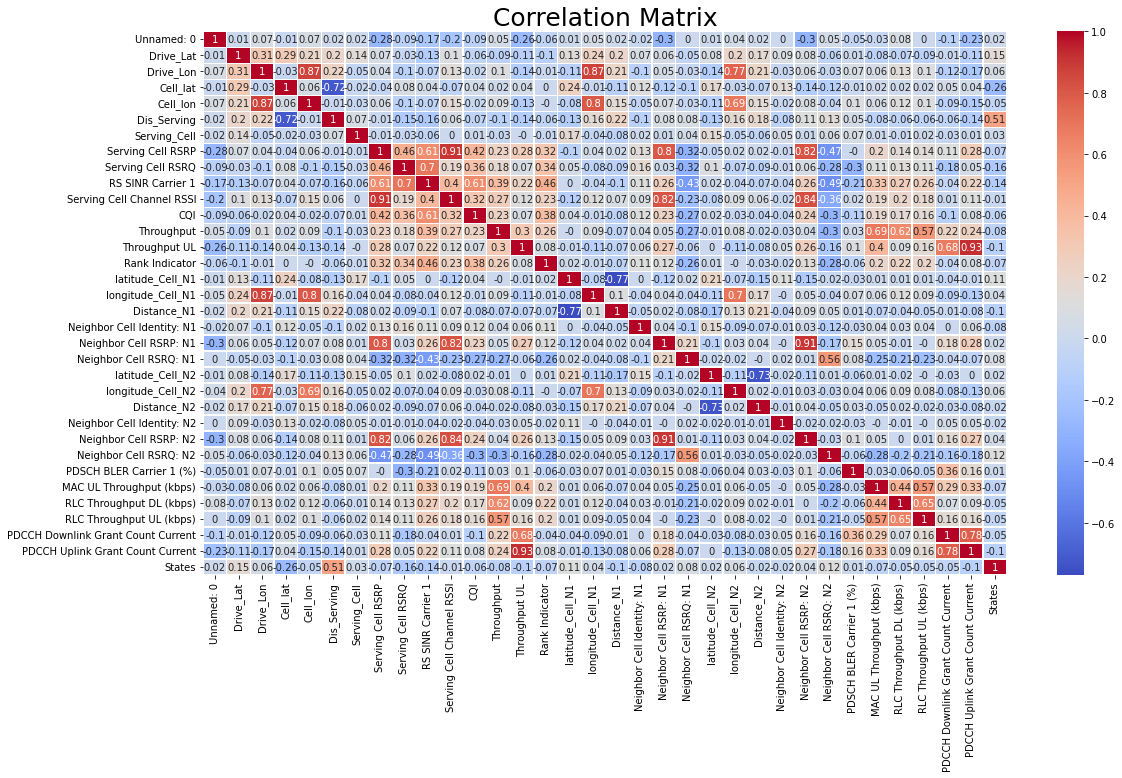

In [ ]:
import seaborn as sns
# Correlation Score
plt.figure(figsize=(18, 10))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap='coolwarm', linewidths=0.3, )
plt.title("Correlation Matrix", size=25)

In [ ]:
df.describe()

Unnamed: 0     Drive_Lat     Drive_Lon      Cell_lat      Cell_lon  \
count  14734.000000  14734.000000  14734.000000  14734.000000  14734.000000   
mean    7408.377087     30.037859     30.971845     30.036562     30.972366   
std     4281.858933      0.004101      0.009294      0.007667      0.008945   
min        0.000000     30.023643     30.955953     29.982552     30.939990   
25%     3702.250000     30.036144     30.966301     30.034190     30.966194   
50%     7398.500000     30.038581     30.970216     30.039874     30.971949   
75%    11123.750000     30.040588     30.975219     30.040550     30.974717   
max    14826.000000     30.058490     31.049273     30.058100     31.032543   

        Dis_Serving  Serving_Cell  Serving Cell RSRP  Serving Cell RSRQ  \
count  14734.000000  14734.000000       14734.000000       14734.000000   
mean       0.506395    164.385096         -80.389765         -14.751785   
std        0.825378    121.931013           9.775027           2.822592   
min        0.000576     12.000000        -120.300003         -30.000000   
25%        0.183842     75.000000         -87.300003         -16.400000   
50%        0.325195    157.000000         -80.099998         -14.400000   
75%        0.460742    189.000000         -73.300003         -12.800000   
max        9.906187    502.000000         -52.400002          -5.900000   

       RS SINR Carrier 1  Serving Cell Channel RSSI           CQI  \
count       14734.000000               14734.000000  14734.000000   
mean            4.642210                 -48.346851      7.434302   
std             5.770821                   7.857579      1.621814   
min           -11.800000                 -75.000000      4.000000   
25%             0.600000                 -54.000000      7.000000   
50%             4.200000                 -48.200001      7.000000   
75%             8.400000                 -42.599998      8.000000   
max            28.500000                 -26.100000     15.000000   

         Throughput  Throughput UL  Rank Indicator  latitude_Cell_N1  \
count  14734.000000   14734.000000    14734.000000      14734.000000   
mean    7030.528279     640.882307        1.249016         30.035600   
std     3859.046840     432.234670        0.432458          0.009694   
min        0.020000       0.000000        1.000000         29.958777   
25%     4217.599975     307.214996        1.000000         30.034190   
50%     7094.962703     559.450012        1.000000         30.039874   
75%     9614.212647     928.230026        1.000000         30.040550   
max    35842.109380    1718.619995        2.000000         30.075200   

       longitude_Cell_N1   Distance_N1  Neighbor Cell Identity: N1  \
count       14734.000000  14734.000000                14734.000000   
mean           30.972628      0.733731                  210.819805   
std             0.009356      0.994956                  158.147457   
min            30.921480      0.000576                    3.000000   
25%            30.966194      0.258186                   76.000000   
50%            30.971949      0.431802                  158.000000   
75%            30.974717      0.722122                  308.000000   
max            31.039209     11.704588                  502.000000   

       Neighbor Cell RSRP: N1  Neighbor Cell RSRQ: N1  latitude_Cell_N2  \
count            14734.000000            14734.000000      14734.000000   
mean               -85.020795              -19.124895         30.035050   
std                  9.006720                4.376602          0.011226   
min               -112.599998              -30.000000         29.958777   
25%                -91.400002              -21.700001         30.033771   
50%                -85.000000              -18.500000         30.039874   
75%                -78.500000              -15.900000         30.040550   
max                -55.700001               -5.300000         30.075200   

       longitude_Cell_N2   Distance_N2  Nei

In [ ]:
df.columns

Index(['Unnamed: 0', 'Drive_Lat', 'Drive_Lon', 'Cell_lat', 'Cell_lon',
       'Dis_Serving', 'Serving_Cell', 'Serving Cell RSRP', 'Serving Cell RSRQ',
       'RS SINR Carrier 1', 'Serving Cell Channel RSSI', 'CQI', 'Throughput',
       'Throughput UL', 'Rank Indicator', 'latitude_Cell_N1',
       'longitude_Cell_N1', 'Distance_N1', 'Neighbor Cell Identity: N1',
       'Neighbor Cell RSRP: N1', 'Neighbor Cell RSRQ: N1', 'latitude_Cell_N2',
       'longitude_Cell_N2', 'Distance_N2', 'Neighbor Cell Identity: N2',
       'Neighbor Cell RSRP: N2', 'Neighbor Cell RSRQ: N2',
       'PDSCH BLER Carrier 1 (%)', 'MAC UL Throughput (kbps)',
       'RLC Throughput DL (kbps)', 'RLC Throughput UL (kbps)',
       'PDCCH Downlink Grant Count Current',
       'PDCCH Uplink Grant Count Current', 'States'],
      dtype='object')

In [ ]:
count_nan = df.isna().sum().sum()
print ('Count of NaN/NULL values: ' + str(count_nan))

Count of NaN/NULL values: 0


In [ ]:
df = df.dropna()

In [ ]:
## More than 3Mbps throughput filteration 
# DataBiggerThan3Mbps = df 
# DataBiggerThan3Mbps = df.query('Throughput > 3000')
# DataBiggerThan3Mbps.describe()

In [ ]:
df.head(3)

Unnamed: 0  Drive_Lat  Drive_Lon  Cell_lat  Cell_lon  Dis_Serving  \
0           0  30.038062  30.977077  30.04072  30.98725     1.022918   
1           1  30.038062  30.977077  30.04072  30.98725     1.022918   
2           2  30.038062  30.977077  30.04072  30.98725     1.022918   

   Serving_Cell  Serving Cell RSRP  Serving Cell RSRQ  RS SINR Carrier 1  \
0           285         -90.500000              -13.5                0.5   
1           285         -91.000000              -13.5               -0.8   
2           285         -89.900002              -13.5               -1.0   

   Serving Cell Channel RSSI  CQI  Throughput  Throughput UL  Rank Indicator  \
0                 -56.900002    7        0.49     638.419165               1   
1                 -57.299999    7       11.81     638.419165               1   
2                 -56.099998    7        0.37      28.730000               1   

   latitude_Cell_N1  longitude_Cell_N1  Distance_N1  \
0          30.04055          30.978168     0.295961   
1          30.04055          30.978168     0.295961   
2          30.04072          30.987250     1.022918   

   Neighbor Cell Identity: N1  Neighbor Cell RSRP: N1  Neighbor Cell RSRQ: N1  \
0                          76              -91.800003                   -13.5   
1                          76              -92.900002                   -15.7   
2                         305              -91.500000                   -17.9   

   latitude_Cell_N2  longitude_Cell_N2  Distance_N2  \
0          30.04650          30.969400     1.194330   
1          30.04650          30.969400     1.194330   
2          30.04055          30.978168     0.295961   

   Neighbor Cell Identity: N2  Neighbor Cell RSRP: N2  Neighbor Cell RSRQ: N2  \
0                         142              -95.300003                   -17.4   
1                         142              -96.800003                   -19.9   
2                          76              -92.400002                   -15.5   

   PDSCH BLER Carrier 1 (%)  MAC UL Throughput (kbps)  \
0                       0.0                122.982238   
1                       0.0                  4.100000   
2                       0.0                  0.840000   

   RLC Throughput DL (kbps)  RLC Throughput UL (kbps)  \
0               7119.502785                125.701727   
1               7119.502785                 24.000000   
2                  0.020000                  0.410000   

   PDCCH Downlink Grant Count Current  PDCCH Uplink Grant Count Current  \
0                         1186.506835                        784.946444   
1                           11.000000                         51.000000   
2                            4.000000                         51.000000   

   States  
0       0  
1       0  
2       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14734 entries, 0 to 14733
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          14734 non-null  int64  
 1   Drive_Lat                           14734 non-null  float64
 2   Drive_Lon                           14734 non-null  float64
 3   Cell_lat                            14734 non-null  float64
 4   Cell_lon                            14734 non-null  float64
 5   Dis_Serving                         14734 non-null  float64
 6   Serving_Cell                        14734 non-null  int64  
 7   Serving Cell RSRP                   14734 non-null  float64
 8   Serving Cell RSRQ                   14734 non-null  float64
 9   RS SINR Carrier 1                   14734 non-null  float64
 10  Serving Cell Channel RSSI           14734 non-null  float64
 11  CQI                                 14734

In [ ]:
# df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14734 entries, 0 to 14733
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          14734 non-null  int64  
 1   Drive_Lat                           14734 non-null  float64
 2   Drive_Lon                           14734 non-null  float64
 3   Cell_lat                            14734 non-null  float64
 4   Cell_lon                            14734 non-null  float64
 5   Dis_Serving                         14734 non-null  float64
 6   Serving_Cell                        14734 non-null  int64  
 7   Serving Cell RSRP                   14734 non-null  float64
 8   Serving Cell RSRQ                   14734 non-null  float64
 9   RS SINR Carrier 1                   14734 non-null  float64
 10  Serving Cell Channel RSSI           14734 non-null  float64
 11  CQI                                 14734

In [ ]:
def preprocess_data(df):
    pre_df = df.copy()
    return pre_df

In [ ]:
pre_df = preprocess_data(df)
pre_df.head(3)

Unnamed: 0  Drive_Lat  Drive_Lon  Cell_lat  Cell_lon  Dis_Serving  \
0           0  30.038062  30.977077  30.04072  30.98725     1.022918   
1           1  30.038062  30.977077  30.04072  30.98725     1.022918   
2           2  30.038062  30.977077  30.04072  30.98725     1.022918   

   Serving_Cell  Serving Cell RSRP  Serving Cell RSRQ  RS SINR Carrier 1  \
0           285         -90.500000              -13.5                0.5   
1           285         -91.000000              -13.5               -0.8   
2           285         -89.900002              -13.5               -1.0   

   Serving Cell Channel RSSI  CQI  Throughput  Throughput UL  Rank Indicator  \
0                 -56.900002    7        0.49     638.419165               1   
1                 -57.299999    7       11.81     638.419165               1   
2                 -56.099998    7        0.37      28.730000               1   

   latitude_Cell_N1  longitude_Cell_N1  Distance_N1  \
0          30.04055          30.978168     0.295961   
1          30.04055          30.978168     0.295961   
2          30.04072          30.987250     1.022918   

   Neighbor Cell Identity: N1  Neighbor Cell RSRP: N1  Neighbor Cell RSRQ: N1  \
0                          76              -91.800003                   -13.5   
1                          76              -92.900002                   -15.7   
2                         305              -91.500000                   -17.9   

   latitude_Cell_N2  longitude_Cell_N2  Distance_N2  \
0          30.04650          30.969400     1.194330   
1          30.04650          30.969400     1.194330   
2          30.04055          30.978168     0.295961   

   Neighbor Cell Identity: N2  Neighbor Cell RSRP: N2  Neighbor Cell RSRQ: N2  \
0                         142              -95.300003                   -17.4   
1                         142              -96.800003                   -19.9   
2                          76              -92.400002                   -15.5   

   PDSCH BLER Carrier 1 (%)  MAC UL Throughput (kbps)  \
0                       0.0                122.982238   
1                       0.0                  4.100000   
2                       0.0                  0.840000   

   RLC Throughput DL (kbps)  RLC Throughput UL (kbps)  \
0               7119.502785                125.701727   
1               7119.502785                 24.000000   
2                  0.020000                  0.410000   

   PDCCH Downlink Grant Count Current  PDCCH Uplink Grant Count Current  \
0                         1186.506835                        784.946444   
1                           11.000000                         51.000000   
2                            4.000000                         51.000000   

   States  
0       0  
1       0  
2       0

In [ ]:
print("The dataset has %d rows and %d columns." % pre_df.shape)

The dataset has 14734 rows and 34 columns.


In [ ]:
pre_df.describe()

Unnamed: 0     Drive_Lat     Drive_Lon      Cell_lat      Cell_lon  \
count  14734.000000  14734.000000  14734.000000  14734.000000  14734.000000   
mean    7408.377087     30.037859     30.971845     30.036562     30.972366   
std     4281.858933      0.004101      0.009294      0.007667      0.008945   
min        0.000000     30.023643     30.955953     29.982552     30.939990   
25%     3702.250000     30.036144     30.966301     30.034190     30.966194   
50%     7398.500000     30.038581     30.970216     30.039874     30.971949   
75%    11123.750000     30.040588     30.975219     30.040550     30.974717   
max    14826.000000     30.058490     31.049273     30.058100     31.032543   

        Dis_Serving  Serving_Cell  Serving Cell RSRP  Serving Cell RSRQ  \
count  14734.000000  14734.000000       14734.000000       14734.000000   
mean       0.506395    164.385096         -80.389765         -14.751785   
std        0.825378    121.931013           9.775027           2.822592   
min        0.000576     12.000000        -120.300003         -30.000000   
25%        0.183842     75.000000         -87.300003         -16.400000   
50%        0.325195    157.000000         -80.099998         -14.400000   
75%        0.460742    189.000000         -73.300003         -12.800000   
max        9.906187    502.000000         -52.400002          -5.900000   

       RS SINR Carrier 1  Serving Cell Channel RSSI           CQI  \
count       14734.000000               14734.000000  14734.000000   
mean            4.642210                 -48.346851      7.434302   
std             5.770821                   7.857579      1.621814   
min           -11.800000                 -75.000000      4.000000   
25%             0.600000                 -54.000000      7.000000   
50%             4.200000                 -48.200001      7.000000   
75%             8.400000                 -42.599998      8.000000   
max            28.500000                 -26.100000     15.000000   

         Throughput  Throughput UL  Rank Indicator  latitude_Cell_N1  \
count  14734.000000   14734.000000    14734.000000      14734.000000   
mean    7030.528279     640.882307        1.249016         30.035600   
std     3859.046840     432.234670        0.432458          0.009694   
min        0.020000       0.000000        1.000000         29.958777   
25%     4217.599975     307.214996        1.000000         30.034190   
50%     7094.962703     559.450012        1.000000         30.039874   
75%     9614.212647     928.230026        1.000000         30.040550   
max    35842.109380    1718.619995        2.000000         30.075200   

       longitude_Cell_N1   Distance_N1  Neighbor Cell Identity: N1  \
count       14734.000000  14734.000000                14734.000000   
mean           30.972628      0.733731                  210.819805   
std             0.009356      0.994956                  158.147457   
min            30.921480      0.000576                    3.000000   
25%            30.966194      0.258186                   76.000000   
50%            30.971949      0.431802                  158.000000   
75%            30.974717      0.722122                  308.000000   
max            31.039209     11.704588                  502.000000   

       Neighbor Cell RSRP: N1  Neighbor Cell RSRQ: N1  latitude_Cell_N2  \
count            14734.000000            14734.000000      14734.000000   
mean               -85.020795              -19.124895         30.035050   
std                  9.006720                4.376602          0.011226   
min               -112.599998              -30.000000         29.958777   
25%                -91.400002              -21.700001         30.033771   
50%                -85.000000              -18.500000         30.039874   
75%                -78.500000              -15.900000         30.040550   
max                -55.700001               -5.300000         30.075200   

       longitude_Cell_N2   Distance_N2  Nei

# DATA VISUALIZATION

<Figure size 720x720 with 0 Axes>

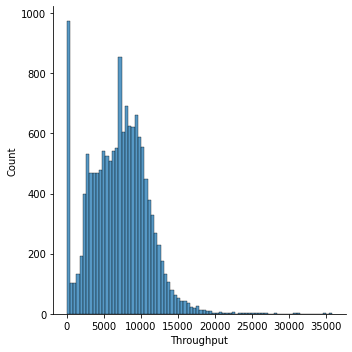

In [ ]:
plt.figure(figsize=(10, 10))
sns.displot(pre_df['Throughput'])

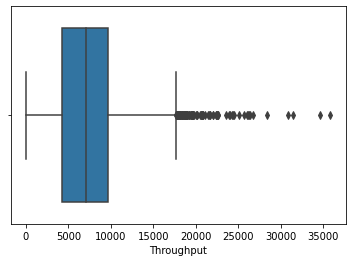

In [ ]:
sns.boxplot(x=pre_df['Throughput'])

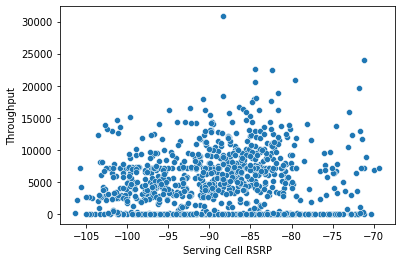

In [ ]:
dfplot = pre_df.head(1000)
sns.scatterplot(data=dfplot,x='Serving Cell RSRP',y='Throughput')

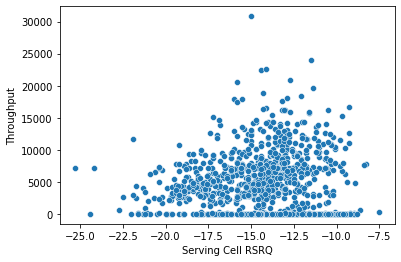

In [ ]:
sns.scatterplot(data=dfplot,x='Serving Cell RSRQ',y='Throughput')

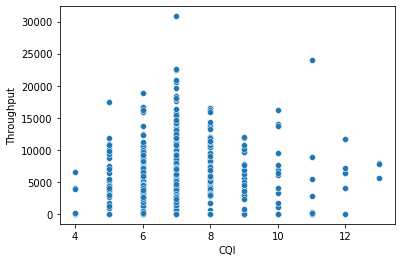

In [ ]:
sns.scatterplot(data=dfplot,x='CQI',y='Throughput')

# Z Score Filteration

In [ ]:
pre_df = pre_df.query('Throughput > 1400')
pre_df['Throughput'].value_counts(sort=False,bins=25 ,ascending=True)

(1365.877, 2777.992]       881
(2777.992, 4155.663]      1523
(4155.663, 5533.335]      1609
(5533.335, 6911.006]      1676
(6911.006, 8288.678]      2231
(8288.678, 9666.349]      2017
(9666.349, 11044.021]     1610
(11044.021, 12421.693]     988
(12421.693, 13799.364]     484
(13799.364, 15177.036]     227
(15177.036, 16554.707]     126
(16554.707, 17932.379]      70
(17932.379, 19310.05]       37
(19310.05, 20687.722]       18
(20687.722, 22065.394]      11
(22065.394, 23443.065]       7
(23443.065, 24820.737]       6
(24820.737, 26198.408]       4
(26198.408, 27576.08]        3
(27576.08, 28953.751]        1
(28953.751, 30331.423]       0
(30331.423, 31709.095]       2
(31709.095, 33086.766]       0
(33086.766, 34464.438]       0
(34464.438, 35842.109]       2
Name: Throughput, dtype: int64

In [ ]:
## Z Score // Z = (X - mean) / std
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(pre_df))
print(z)

[[1.77795179 0.05630424 0.55492378 ... 2.57006333 1.73570462 0.25547813]
 [1.77770995 0.05251977 0.5514229  ... 0.21271642 0.14013134 0.25547813]
 [1.7774681  0.04727599 0.54689889 ... 0.21271642 0.14013134 0.25547813]
 ...
 [1.80597011 0.07899891 0.6468702  ... 1.02509368 0.34788887 0.25547813]
 [1.80621195 0.07243932 0.6332791  ... 0.53592962 0.74731896 0.25547813]
 [1.8064538  0.06990013 0.62700995 ... 1.42470357 1.45039742 0.25547813]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([    3,    43,    61, ..., 13515, 13516, 13517]), array([33, 30, 33, ..., 33, 27, 27]))


In [ ]:
print(z[65][6])

2.1039947618669084


In [ ]:
pre_df = pre_df[(z < 2.5).all(axis=1)]

In [ ]:
print("The dataset has %d rows and %d columns." % pre_df.shape)

The dataset has 9146 rows and 34 columns.


In [ ]:
pre_df['Throughput'].value_counts(sort=False,bins=25 ,ascending=True)

(1385.555, 1990.887]      107
(1990.887, 2581.454]      287
(2581.454, 3172.02]       478
(3172.02, 3762.587]       475
(3762.587, 4353.154]      450
(4353.154, 4943.721]      477
(4943.721, 5534.288]      512
(5534.288, 6124.854]      503
(6124.854, 6715.421]      546
(6715.421, 7305.988]      685
(7305.988, 7896.555]      610
(7896.555, 8487.122]      687
(8487.122, 9077.688]      593
(9077.688, 9668.255]      632
(9668.255, 10258.822]     549
(10258.822, 10849.389]    413
(10849.389, 11439.956]    319
(11439.956, 12030.523]    254
(12030.523, 12621.089]    185
(12621.089, 13211.656]    139
(13211.656, 13802.223]     92
(13802.223, 14392.79]      58
(14392.79, 14983.357]      41
(14983.357, 15573.923]     30
(15573.923, 16164.49]      24
Name: Throughput, dtype: int64

In [ ]:
pre_df.describe()

Unnamed: 0    Drive_Lat    Drive_Lon     Cell_lat     Cell_lon  \
count   9146.000000  9146.000000  9146.000000  9146.000000  9146.000000   
mean    7201.806691    30.037588    30.969842    30.037795    30.970809   
std     4167.653345     0.003618     0.005313     0.004369     0.005453   
min        6.000000    30.027575    30.955953    30.025140    30.959722   
25%     3617.250000    30.035828    30.966153    30.034190    30.966194   
50%     6800.000000    30.038393    30.968967    30.039874    30.971949   
75%    10839.750000    30.040089    30.972937    30.040550    30.971949   
max    14826.000000    30.046372    30.994619    30.050030    30.995038   

       Dis_Serving  Serving_Cell  Serving Cell RSRP  Serving Cell RSRQ  \
count  9146.000000   9146.000000        9146.000000        9146.000000   
mean      0.322824    150.768533         -80.154767         -14.551192   
std       0.209440    111.895323           9.068377           2.352204   
min       0.000576     12.000000        -103.800003         -21.600000   
25%       0.169767     59.000000         -86.800003         -16.000000   
50%       0.305193    156.000000         -80.000000         -14.200000   
75%       0.418389    158.000000         -73.599998         -12.800000   
max       1.666894    422.000000         -55.799999          -8.000000   

       RS SINR Carrier 1  Serving Cell Channel RSSI          CQI  \
count        9146.000000                9146.000000  9146.000000   
mean            4.955056                 -48.728318     7.308660   
std             5.368846                   7.205358     1.356178   
min            -8.500000                 -67.199997     4.000000   
25%             1.100000                 -54.099998     7.000000   
50%             4.700000                 -48.599998     7.000000   
75%             8.700000                 -43.599998     8.000000   
max            19.200001                 -28.600000    11.000000   

         Throughput  Throughput UL  Rank Indicator  latitude_Cell_N1  \
count   9146.000000    9146.000000     9146.000000       9146.000000   
mean    7345.731328     739.964534        1.253553         30.037819   
std     3003.076075     435.558927        0.435069          0.005157   
min     1400.319946       5.700000        1.000000         30.013694   
25%     4953.719971     372.137489        1.000000         30.034190   
50%     7344.895019     638.419165        1.000000         30.039874   
75%     9506.702637    1099.684967        2.000000         30.040550   
max    16164.490230    1718.619995        2.000000         30.058039   

       longitude_Cell_N1  Distance_N1  Neighbor Cell Identity: N1  \
count        9146.000000  9146.000000                 9146.000000   
mean           30.971239     0.475206                  219.697026   
std             0.006183     0.333358                  169.946095   
min            30.955201     0.000576                    3.000000   
25%            30.966194     0.249758                   76.000000   
50%            30.971949     0.425129                  157.000000   
75%            30.971949     0.631707                  420.000000   
max            30.995038     3.110466                  502.000000   

       Neighbor Cell RSRP: N1  Neighbor Cell RSRQ: N1  latitude_Cell_N2  \
count             9146.000000             9146.000000       9146.000000   
mean               -85.171933              -19.326864         30.035981   
std                  8.357741                4.321513          0.009011   
min               -106.900002              -30.000000         30.008100   
25%                -91.099998              -21.900000         30.034190   
50%                -85.199997              -18.700001         30.039874   
75%                -79.300003              -16.200001         30.040550   
max                -62.299999               -9.100000         30.062440   

       longitude_Cell_N2  Distance_N2  Neighbor Cell Identity: N2  \
count        9146.000000  9146.000000

# Visualization 

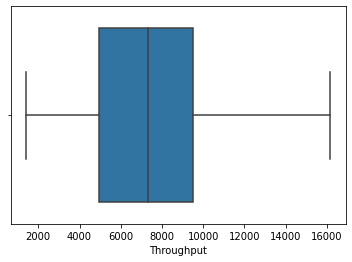

In [ ]:
sn.boxplot(x=pre_df['Throughput'])

<Figure size 576x360 with 0 Axes>

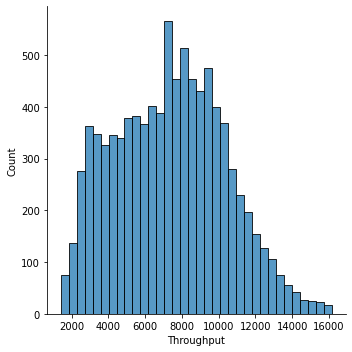

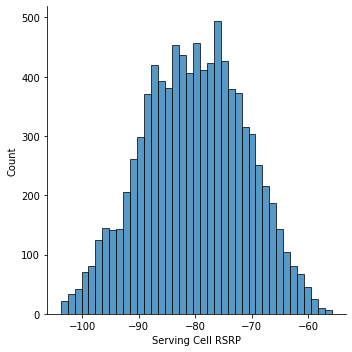

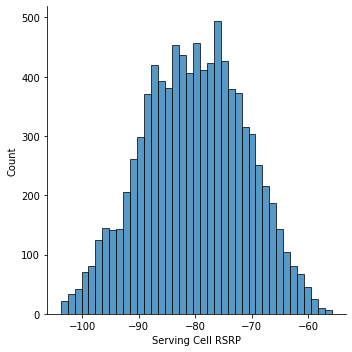

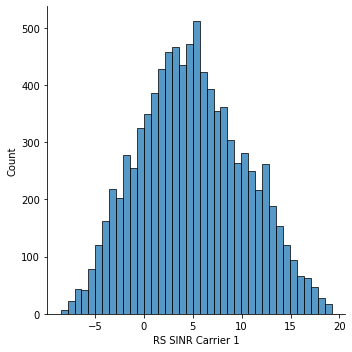

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.displot(pre_df['Throughput'])
sns.displot(pre_df['Serving Cell RSRP'])
sns.displot(pre_df['Serving Cell RSRP'])
sns.displot(pre_df['RS SINR Carrier 1'])
# sns.displot(pre_df['Serving Cell Channel RSSI'])


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

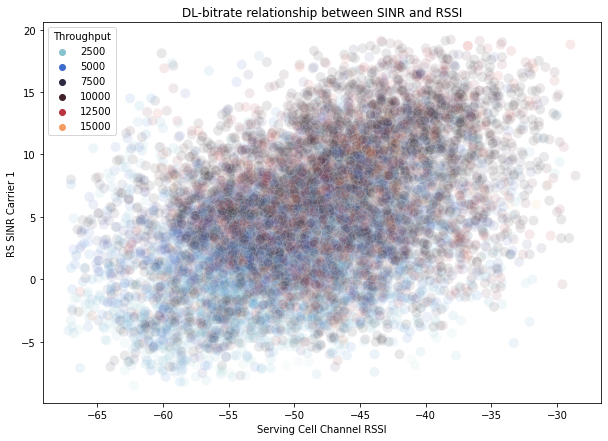

In [ ]:
ax = sn.scatterplot(x=pre_df['Serving Cell Channel RSSI'], y=pre_df['RS SINR Carrier 1'], s=100,alpha=0.1, palette="icefire", hue=pre_df['Throughput'])
plt.title('DL-bitrate relationship between SINR and RSSI')
# Remove the legend and add a colorbar
plt.show()

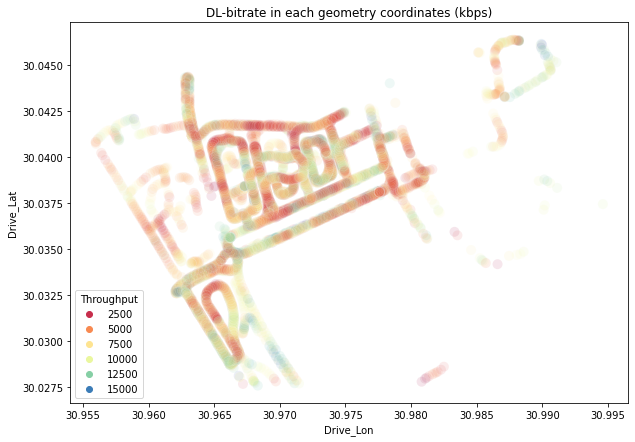

In [ ]:
ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Throughput'])
plt.title('DL-bitrate in each geometry coordinates (kbps)')
# Remove the legend and add a colorbar
plt.show()

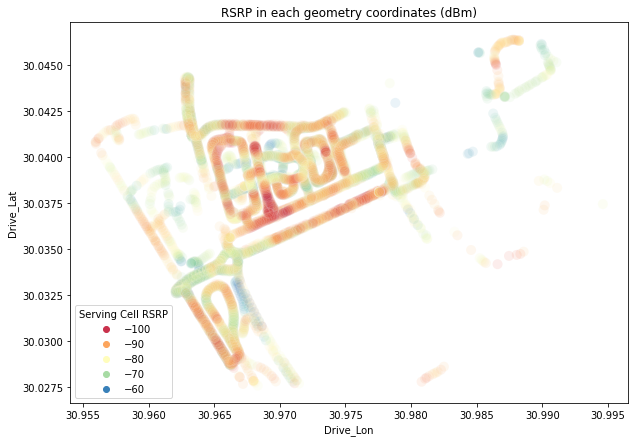

In [ ]:
ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Serving Cell RSRP'])
plt.title('RSRP in each geometry coordinates (dBm)')
# Remove the legend and add a colorbar
plt.show()

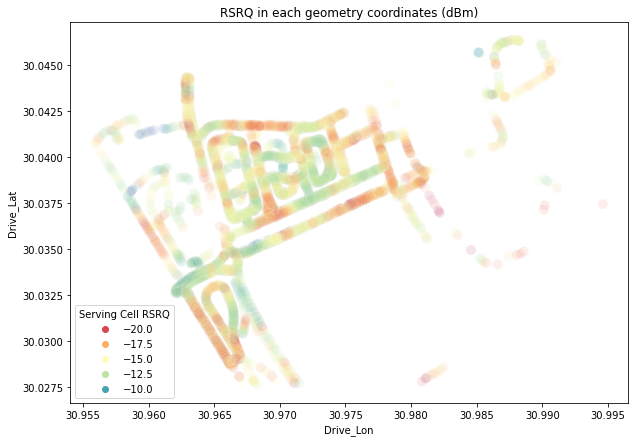

In [ ]:
ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Serving Cell RSRQ'])
plt.title('RSRQ in each geometry coordinates (dBm)')
# Remove the legend and add a colorbar
plt.show()

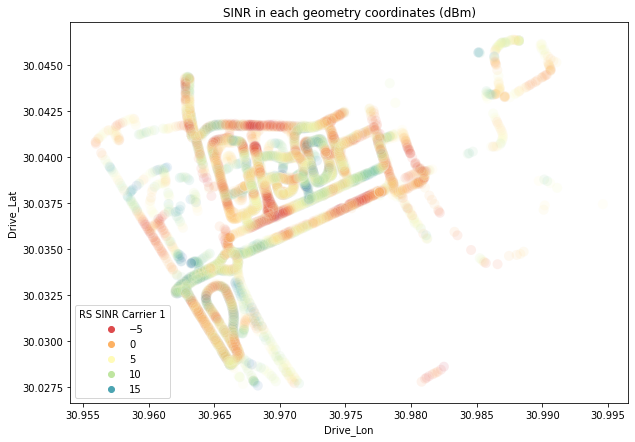

In [ ]:
ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['RS SINR Carrier 1'])
plt.title('SINR in each geometry coordinates (dBm)')
# Remove the legend and add a colorbar
plt.show()

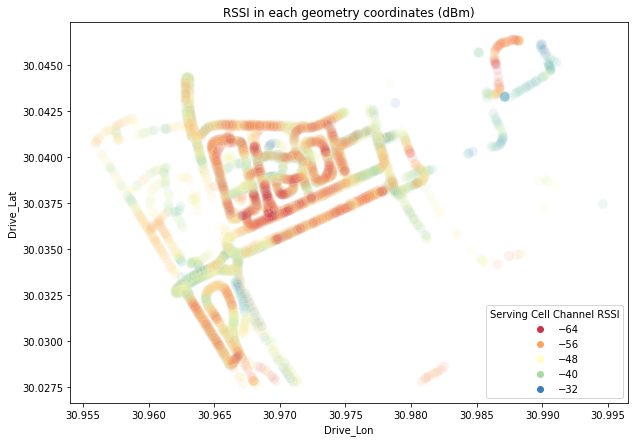

In [ ]:
ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Serving Cell Channel RSSI'])
plt.title('RSSI in each geometry coordinates (dBm)')
# Remove the legend and add a colorbar
plt.show()

# Data Splitting 

In [ ]:
# Labels are the values we want to predict
labels = np.array(pre_df['Throughput'])
# Remove the labels from the features
# axis 1 refers to the columns
features= pre_df.drop('Throughput', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import model_selection
# Split the data into training and testing sets
x_train, x_test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range=(0,10))
train_features = s.fit_transform(x_train)
test_features = s.transform(x_test)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6402, 33)
Training Labels Shape: (6402,)
Testing Features Shape: (2744, 33)
Testing Labels Shape: (2744,)


# Time Function

In [ ]:
import datetime
from datetime import datetime, timedelta
def posix_time(dt):
                return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)

# Random Forest Model

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rf = RandomForestRegressor(n_estimators = 400,random_state = 42,bootstrap=False,max_depth = None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
# Train the model on training data
rf.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rf_duration = t1-t0
print(rf_duration)

15.127974033355713


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
# errors = abs(predictions - test_labels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'kbps.')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RLC Throughput DL (kbps) Importance: 0.3
Variable: MAC UL Throughput (kbps) Importance: 0.17
Variable: RLC Throughput UL (kbps) Importance: 0.15
Variable: Unnamed: 0           Importance: 0.04
Variable: RS SINR Carrier 1    Importance: 0.04
Variable: Serving Cell RSRQ    Importance: 0.03
Variable: Throughput UL        Importance: 0.02
Variable: PDSCH BLER Carrier 1 (%) Importance: 0.02
Variable: PDCCH Downlink Grant Count Current Importance: 0.02
Variable: PDCCH Uplink Grant Count Current Importance: 0.02
Variable: Drive_Lat            Importance: 0.01
Variable: Drive_Lon            Importance: 0.01
Variable: Dis_Serving          Importance: 0.01
Variable: Serving_Cell         Importance: 0.01
Variable: Serving Cell RSRP    Importance: 0.01
Variable: Serving Cell Channel RSSI Importance: 0.01
Variable: CQI                  Importance: 0.01
Variable: Rank Indicator       Importance: 0.01
Variable: Distance_N1          Importance: 0.01
Variable: Neighbor Cell Identity: N1 Impor

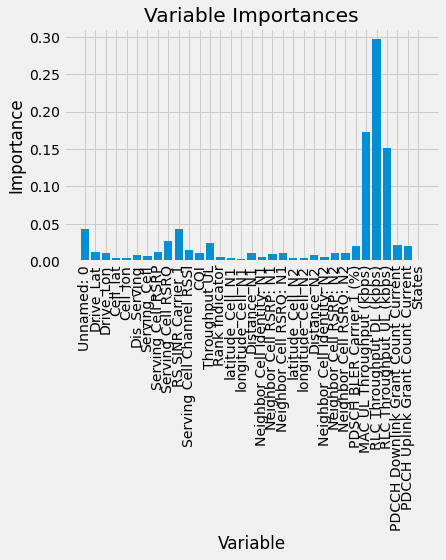

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

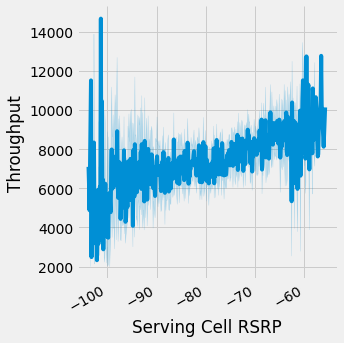

In [ ]:
g = sn.relplot(x ="Serving Cell RSRP", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

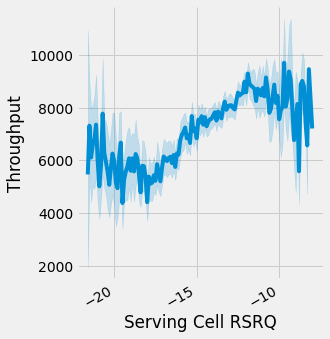

In [ ]:
g = sn.relplot(x ="Serving Cell RSRQ", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

Evaluating the Algorithm

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

Mean Absolute Error: 796.3258310126829 Kbps
Mean Squared Error: 1361776.629250159 Kbps
Root Mean Squared Error: 1166.9518538697982 Kbps
Mean Absolute Percentage Error: 0.12522560066538233 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for random forest model is', "{:.2f}".format(r2*100) ,'%')

R2 score for random forest model is 84.99 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10378.39646258  6131.01990273 10006.86150985 ...  7978.05447736
  7684.04501001  6358.35390643]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10378.396463
1      4776.520020   6131.019903
2     10267.730470  10006.861510
3      3821.270020   4334.149908
4      6392.120117   5579.469589
...            ...           ...
2739   8907.709961   9748.940725
2740   3370.600098   3806.404422
2741   7116.709961   7978.054477
2742   7094.962703   7684.045010
2743   6210.560059   6358.353906

[2744 rows x 2 columns]

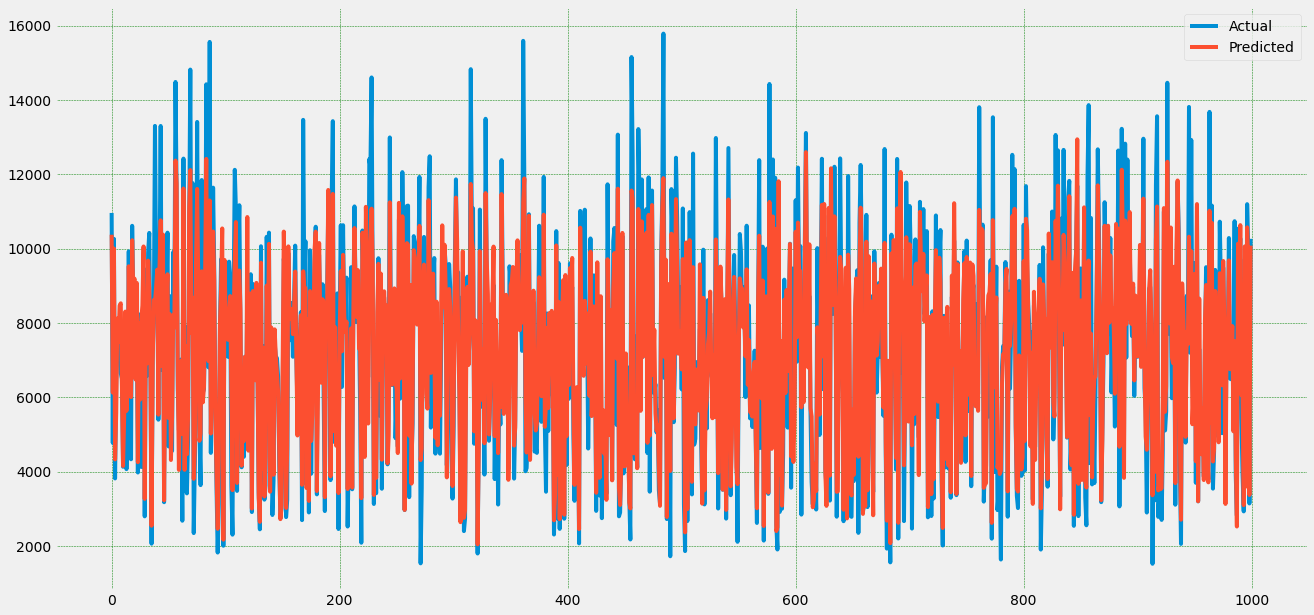

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

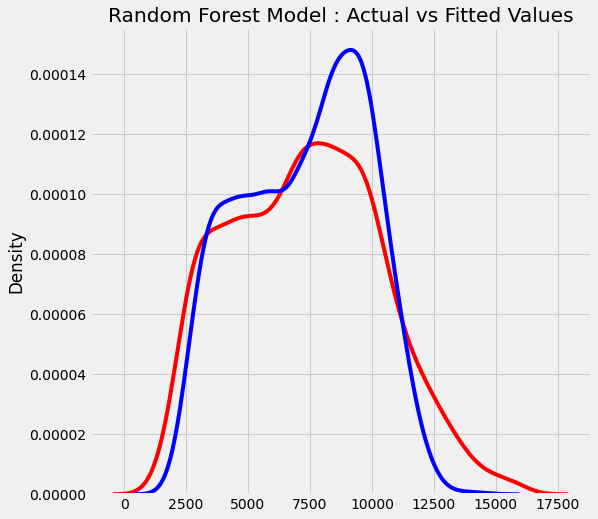

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Random Forest Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rf.score(test_features,test_labels)

0.8498584024501371

# Random Search with Cross Validation for Random Forest

Examine the Default Random Forest to Determine Parameters
We will use these parameters as a starting point. I relied on the sklearn random forest documentation to determine which features to change and the available options.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  89,
                  129,
                  169,
                  209,
                  248,
                  288,
                  328,
                  368,
                  408,
                  447,
                  487,
                  527,
                  567,
                  607,
                  646,
                  686,
                  726,
                  766,
                  806,
                  845,
                  885,
                  925,
                  965,
                  1005,
                  1044,
                  1084,
                  1124,
                  1164,
                  1204,
                  1243,
                  1283,
                  1323,
                  1363,
            

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# rfModified = RandomForestRegressor(random_state = 42)
# rfModified.fit(train_features, train_labels);
# Fit the random search model
rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 766}

In [ ]:
# rf_random.cv_results_

Evaluation Function

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} Kbps.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Evaluate the default model

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 1034.1861 Kbps.
Accuracy = 84.29%.


Evaluate the Best Random Search Model

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 981.1399 Kbps.
Accuracy = 85.08%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.93%.


# Grid Search for Random Forest
We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000,1500,2000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels);

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 2000}

Evaluate the Best Model from Grid Search

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 979.4603 Kbps.
Accuracy = 85.15%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.02%.


Grid Search 2

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_final.fit(train_features, train_labels);

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 75}

In [ ]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, test_features, test_labels)

Model Performance
Average Error: 990.1645 Kbps.
Accuracy = 84.99%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.83%.


Final Model
The final model from hyperparameter tuning is as follows.

In [ ]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, test_features, test_labels)

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 80,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
Average Error: 979.4603 Kbps.
Accuracy = 85.15%.


# Random Forest Model with Hyperparameters Tuning 

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rf1 = RandomForestRegressor(n_estimators = 800,random_state = 42,bootstrap=True,max_depth = 110,min_samples_leaf=5,min_samples_split=10)
# Train the model on training data
rf1.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rf1_duration = t1-t0
print(rf1_duration)

72.02546501159668


In [ ]:
# Use the forest's predict method on the test data
predictions = rf1.predict(test_features)
# Calculate the absolute errors
# errors = abs(predictions - test_labels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'kbps.')

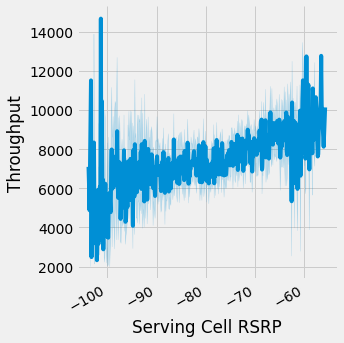

In [ ]:
g = sn.relplot(x ="Serving Cell RSRP", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

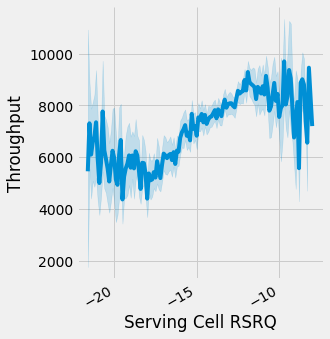

In [ ]:
g = sn.relplot(x ="Serving Cell RSRQ", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

Evaluating the Algorithm

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

Mean Absolute Error: 727.1096194189611 Kbps
Mean Squared Error: 1276711.7759293127 Kbps
Root Mean Squared Error: 1129.9167119435454 Kbps
Mean Absolute Percentage Error: 0.1099805691696158 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for random forest model is', "{:.2f}".format(r2*100) ,'%')

R2 score for random forest model is 85.92 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10643.53702496  5889.4447908   9980.55097358 ...  7551.50122442
  7715.07455445  6465.37303415]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10643.537025
1      4776.520020   5889.444791
2     10267.730470   9980.550974
3      3821.270020   3913.396877
4      6392.120117   5058.092721
...            ...           ...
2739   8907.709961   9738.543474
2740   3370.600098   3536.524638
2741   7116.709961   7551.501224
2742   7094.962703   7715.074554
2743   6210.560059   6465.373034

[2744 rows x 2 columns]

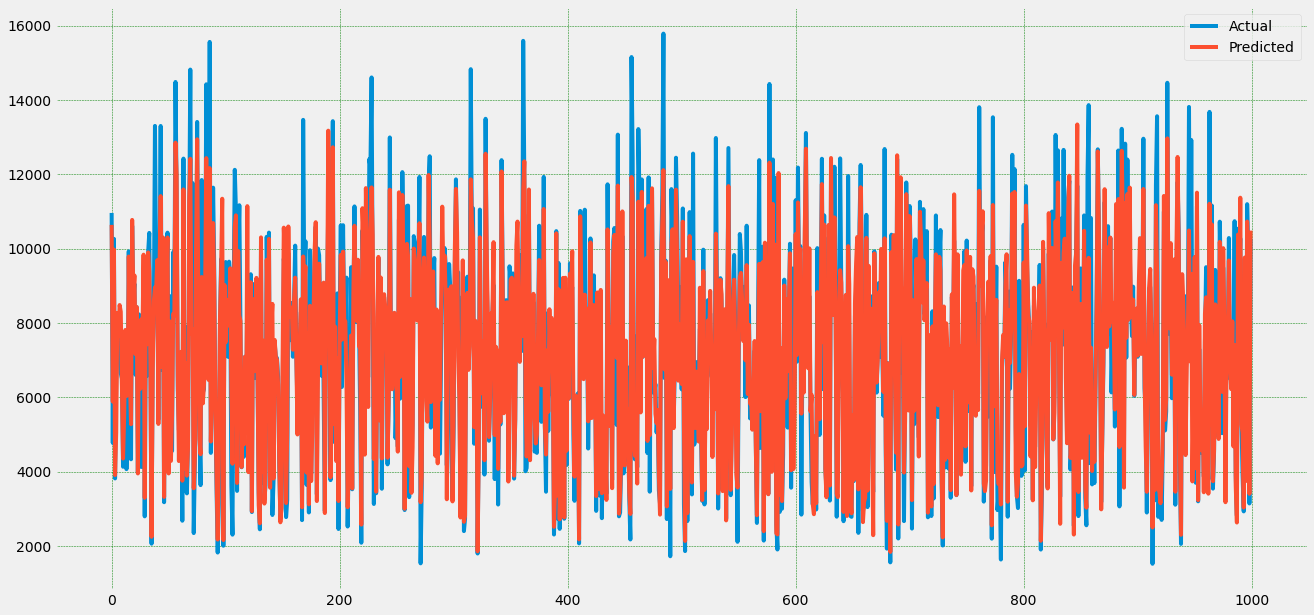

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

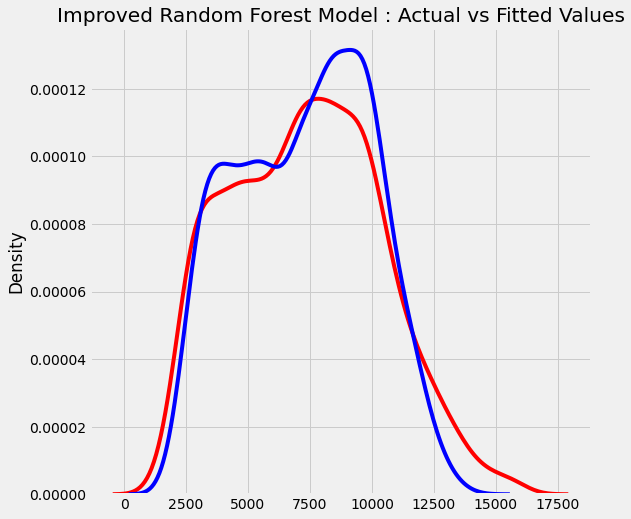

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved Random Forest Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rf1.score(test_features,test_labels)

0.859237160095559

In [ ]:
# plt.style.use('seaborn')
# y_pred = rf1.predict(train_features)
# print("R-squared for train data",rf1.score(train_features, train_labels))
# sns.scatterplot(train_labels, y_pred)
# plt.title('Train count Vs Prediction')
# plt.xlabel("y_train")
# plt.ylabel("y_pred")
# plt.show()

# ExtraTreeRegressor

In [ ]:
# Import the model we are using
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
extra_tree = ExtraTreeRegressor(random_state=42)
# Train the model on training data
reg = BaggingRegressor(extra_tree, random_state=42,n_estimators=400).fit(train_features, train_labels)
reg.score(test_features, test_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
extratree_duration = t1-t0
print(extratree_duration)

14.10072922706604


In [ ]:
# Use the forest's predict method on the test data
predictions = reg.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'kbps.')

Mean Absolute Error: 757.95 kbps.


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for ExtraTree Regressor model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 757.9497429198267 Kbps
Mean Squared Error: 1329193.663428781 Kbps
Root Mean Squared Error: 1152.9066152246596 Kbps
Mean Absolute Percentage Error: 0.1160664030029223 %
R2 score for ExtraTree Regressor model is 85.35 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10265.11072653  6079.49463318 10074.77929781 ...  7790.11237816
  7455.24238535  6276.32292849]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10265.110727
1      4776.520020   6079.494633
2     10267.730470  10074.779298
3      3821.270020   4143.165521
4      6392.120117   5175.684886
...            ...           ...
2739   8907.709961  10513.124272
2740   3370.600098   3938.700375
2741   7116.709961   7790.112378
2742   7094.962703   7455.242385
2743   6210.560059   6276.322928

[2744 rows x 2 columns]

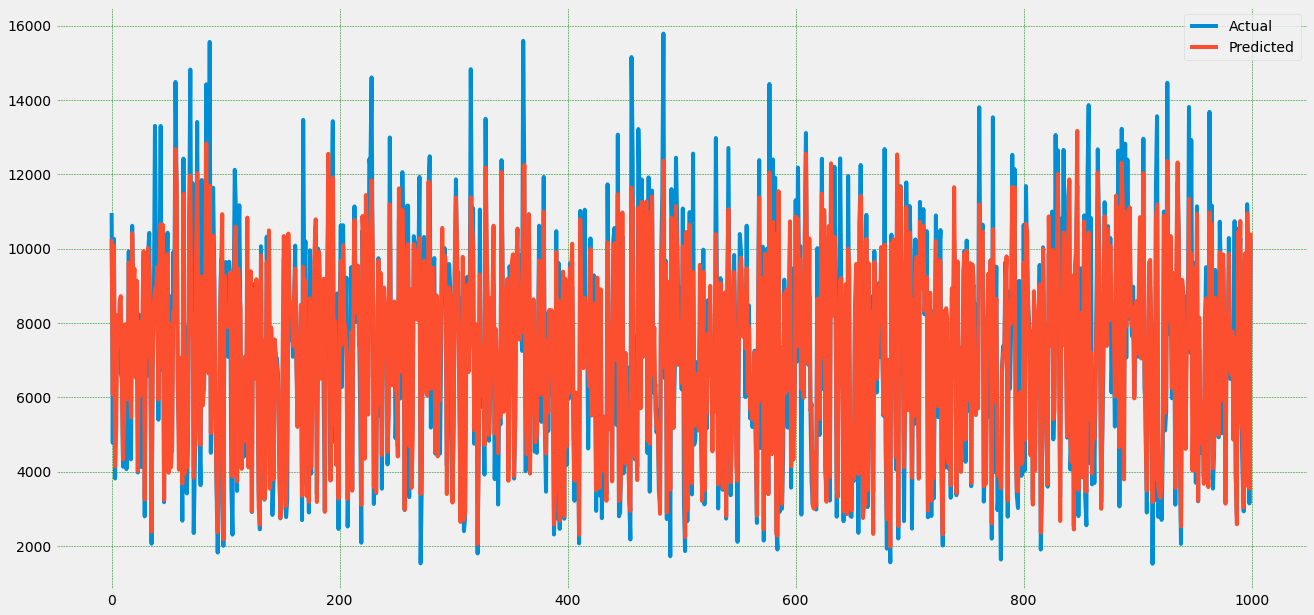

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

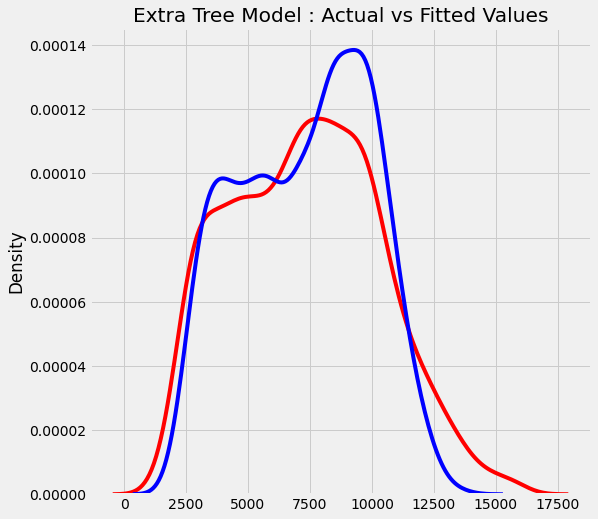

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Extra Tree Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
reg.score(test_features,test_labels)

0.853450811393172

# Model Development with AdaBoost Regressor


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost1 = AdaBoostRegressor(n_estimators=800)
AdaBoost1.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
AdaBoost1_duration = t1-t0
print(AdaBoost1_duration)

6.453752040863037


In [ ]:
predictions = AdaBoost1.predict(test_features)

In [ ]:
# Evaluating the Algorithm
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for AdaBoostRegressor model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1499.9935241668538 Kbps
Mean Squared Error: 3234398.764104244 Kbps
Root Mean Squared Error: 1798.4434281078302 Kbps
Mean Absolute Percentage Error: 0.2790826631526324 %
R2 score for AdaBoostRegressor model is 64.34 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [11141.92562845  7015.44438945 10715.23664973 ...  9376.87967546
 10307.28253699  7846.60707075]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  11141.925628
1      4776.520020   7015.444389
2     10267.730470  10715.236650
3      3821.270020   5006.124957
4      6392.120117   5586.227012
...            ...           ...
2739   8907.709961  10778.013600
2740   3370.600098   5871.146786
2741   7116.709961   9376.879675
2742   7094.962703  10307.282537
2743   6210.560059   7846.607071

[2744 rows x 2 columns]

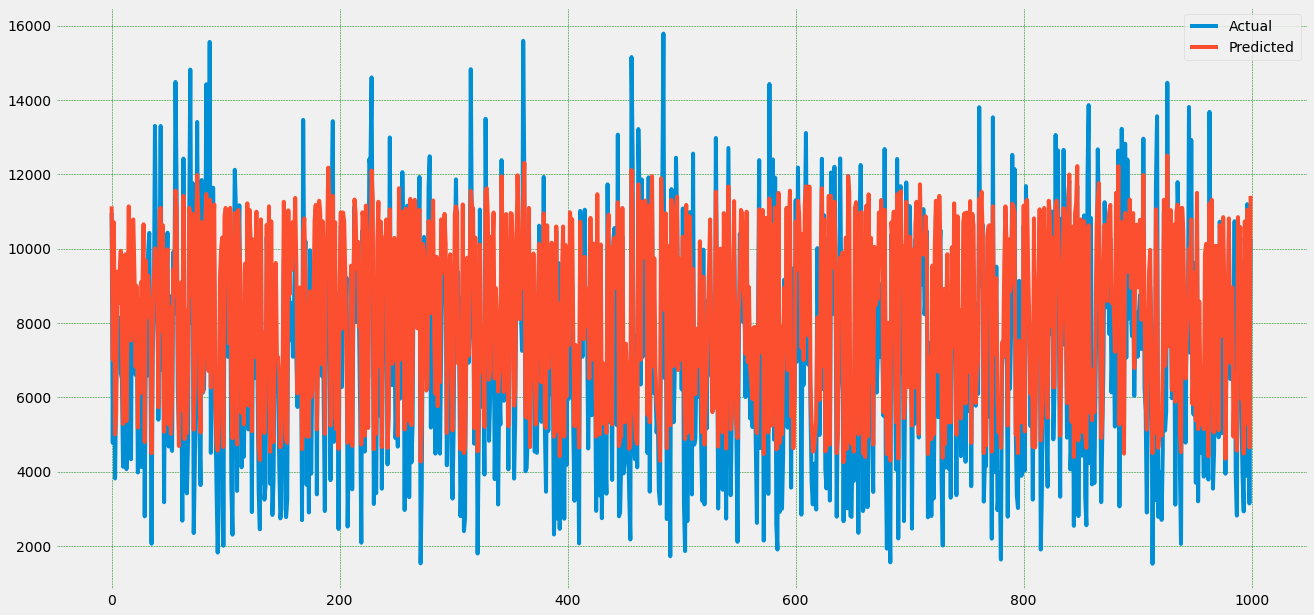

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

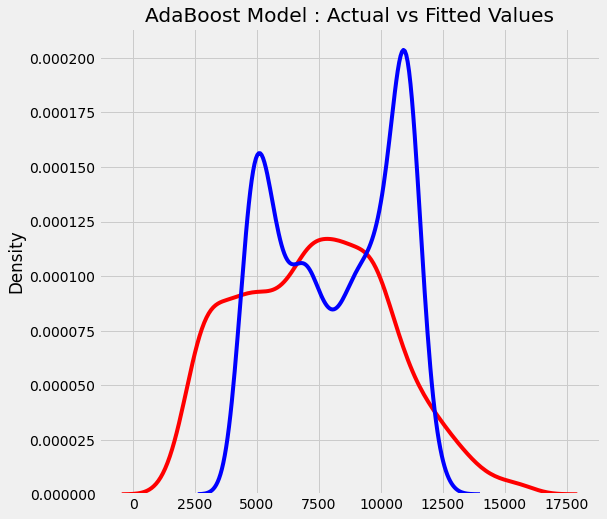

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('AdaBoost Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
AdaBoost1.score(test_features,test_labels)

0.6433939405882512

# Adaboost HyperParameters Tuning

In [ ]:
AdaBoost1.get_params(deep=True)

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 400,
 'random_state': None}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = AdaBoostRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0,10],
 'n_estimators' : [50, 100, 400,800],
 'loss' : ['linear', 'square', 'exponential']
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(train_features, train_labels)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")
# Evaluate the model using the test data
predictions = model.predict(test_features)
mse = mean_squared_error(test_labels, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_labels, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Downlink Throughput Prediction')
# overlay the regression line
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)
plt.plot(test_labels,p(test_labels), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50} 

AdaBoostRegressor(learning_rate=0.1, loss='exponential') 



NameError: ignored

# Adaboost Model With Hyperparameters Tunning

In [ ]:
## Best parameter combination: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50} 

from sklearn.ensemble import AdaBoostRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost2 = AdaBoostRegressor(learning_rate=0.1, loss='exponential',n_estimators=50)
AdaBoost2.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
AdaBoost2_duration = t1-t0
print(AdaBoost2_duration)

2.538954019546509


In [ ]:
predictions = AdaBoost2.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for AdaBoostRegressor model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1137.222586884079 Kbps
Mean Squared Error: 2349070.0816340987 Kbps
Root Mean Squared Error: 1532.6676357364954 Kbps
Mean Absolute Percentage Error: 0.19148946939410386 %
R2 score for AdaBoostRegressor model is 74.10 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10009.86755713  6150.48140647  9714.24849448 ...  7960.13294457
  9113.69346876  6834.23542705]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10009.867557
1      4776.520020   6150.481406
2     10267.730470   9714.248494
3      3821.270020   3980.382087
4      6392.120117   4189.055537
...            ...           ...
2739   8907.709961  10015.688043
2740   3370.600098   3980.382087
2741   7116.709961   7960.132945
2742   7094.962703   9113.693469
2743   6210.560059   6834.235427

[2744 rows x 2 columns]

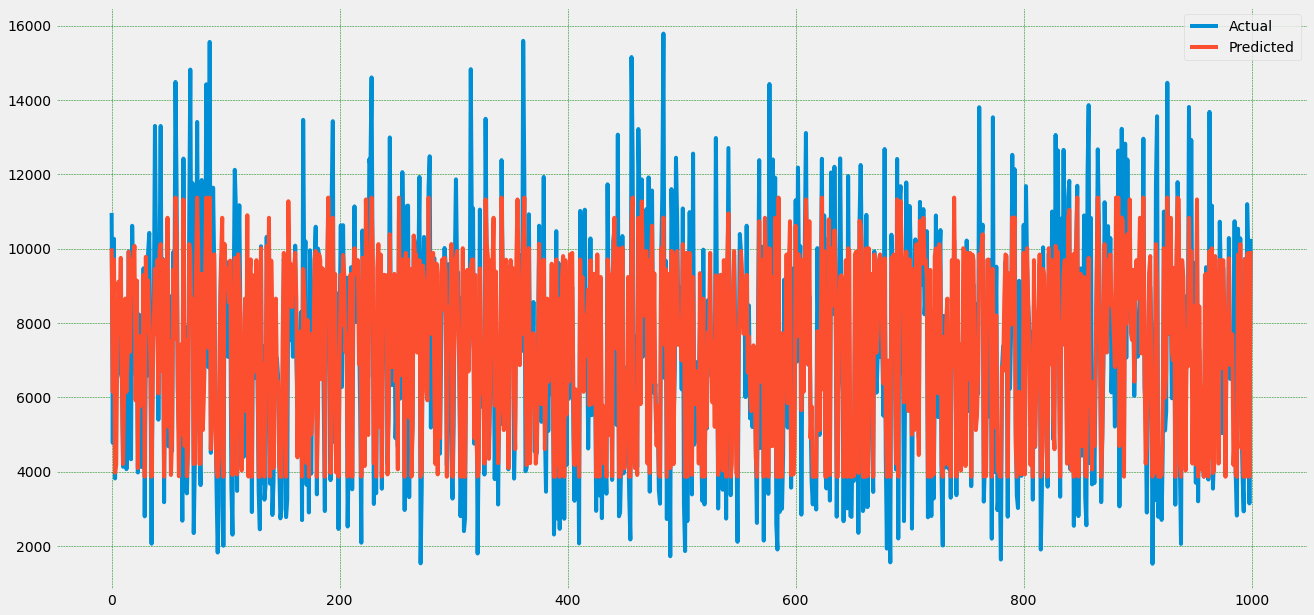

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

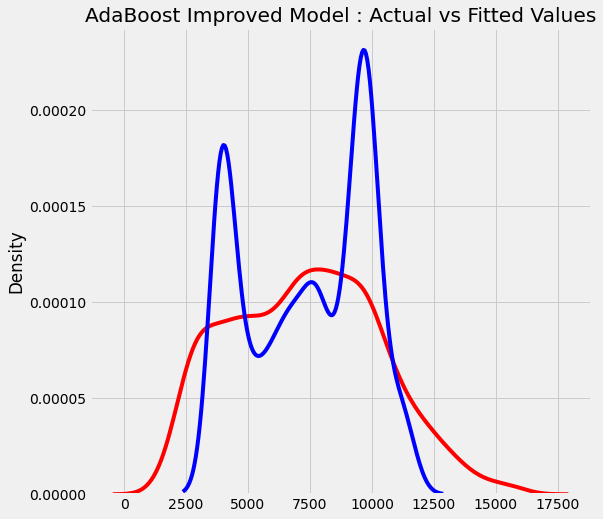

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('AdaBoost Improved Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
AdaBoost2.score(test_features,test_labels)

0.7410051492752263

# Model Development with Linear Regression


In [ ]:
# Import the model we are using
from sklearn.linear_model import LinearRegression
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
lin_reg_duration = t1-t0
print(lin_reg_duration)

0.031755924224853516


In [ ]:
# Use the model's predict method on the test data
predictions = lin_reg.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for LinearRegression model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1097.4784760506782 Kbps
Mean Squared Error: 2311832.1621520617 Kbps
Root Mean Squared Error: 1520.4710329868378 Kbps
Mean Absolute Percentage Error: 0.1725884217270273 %
R2 score for LinearRegression model is 74.51 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10272.58624978  7081.71613161  9011.97082564 ...  8113.05774867
  8901.94675423  6182.91435147]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10272.586250
1      4776.520020   7081.716132
2     10267.730470   9011.970826
3      3821.270020   5100.175904
4      6392.120117   8511.152670
...            ...           ...
2739   8907.709961  12123.763604
2740   3370.600098   3689.932866
2741   7116.709961   8113.057749
2742   7094.962703   8901.946754
2743   6210.560059   6182.914351

[2744 rows x 2 columns]

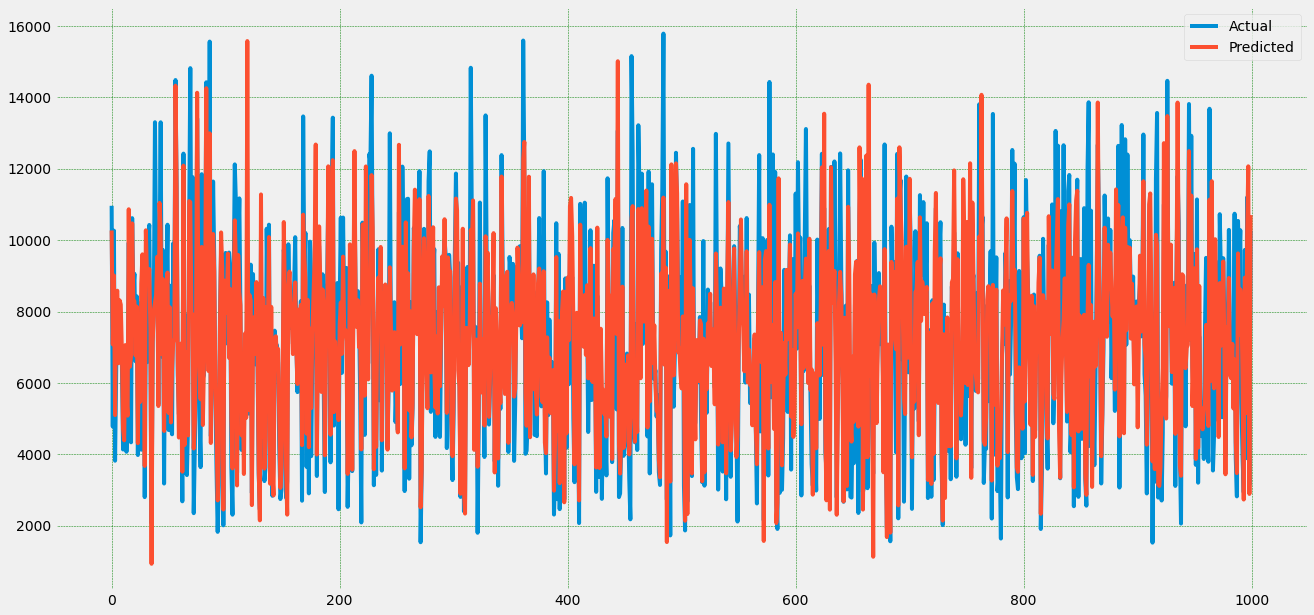

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

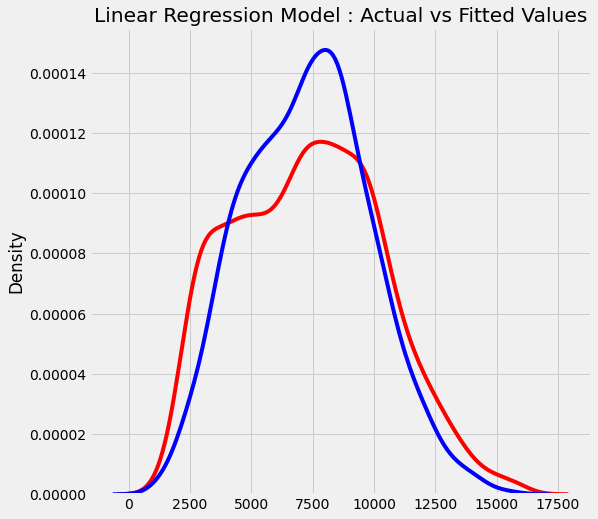

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Linear Regression Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
lin_reg.score(test_features,test_labels)

0.7451107864262654

# Model Development with Ridge Regression


In [ ]:
# Import the model we are using
from sklearn.linear_model import Ridge
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rr1 = Ridge(alpha=0.01)
rr1.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rr1_duration = t1-t0
print(rr1_duration)

0.006968975067138672


In [ ]:
# Use the model's predict method on the test data
predictions = rr1.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for Ridge model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1097.47836798694 Kbps
Mean Squared Error: 2311832.5234005763 Kbps
Root Mean Squared Error: 1520.471151781768 Kbps
Mean Absolute Percentage Error: 0.1725883336092739 %
R2 score for Ridge model is 74.51 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10272.59279307  7081.70038749  9011.9699813  ...  8113.05037995
  8901.94372226  6182.914597  ]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10272.592793
1      4776.520020   7081.700387
2     10267.730470   9011.969981
3      3821.270020   5100.136731
4      6392.120117   8511.104795
...            ...           ...
2739   8907.709961  12123.750443
2740   3370.600098   3689.952007
2741   7116.709961   8113.050380
2742   7094.962703   8901.943722
2743   6210.560059   6182.914597

[2744 rows x 2 columns]

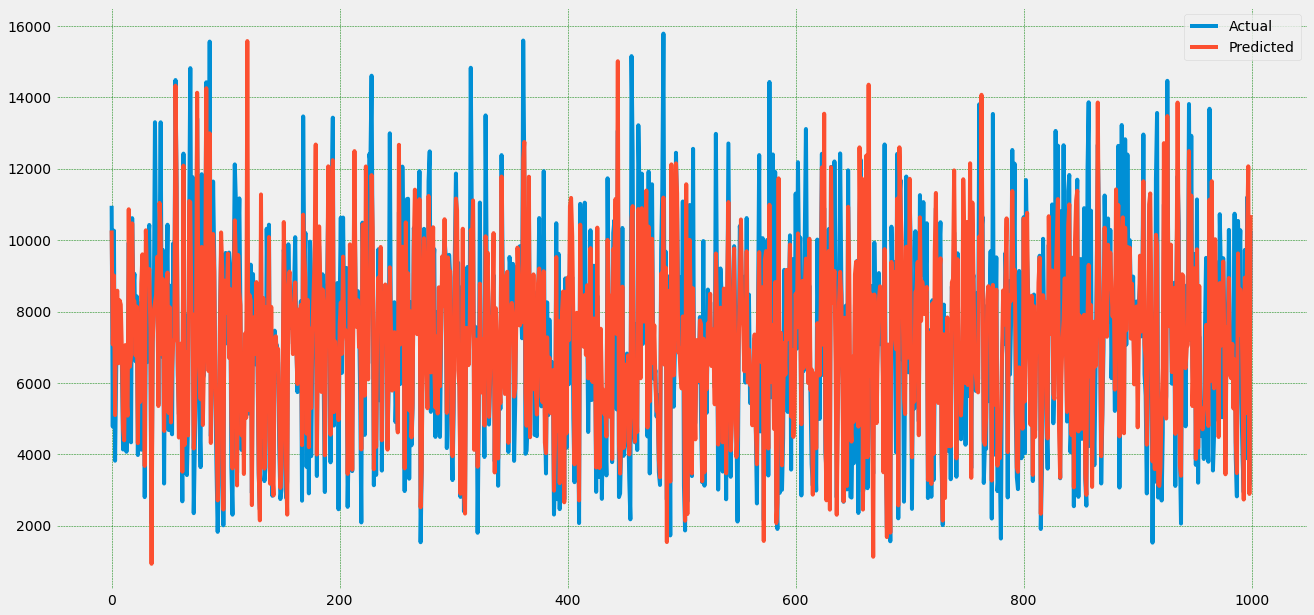

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

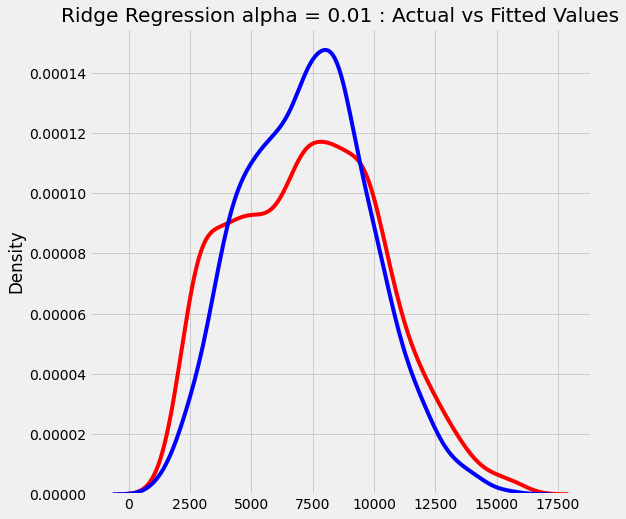

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Ridge Regression alpha = 0.01 : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rr1.score(test_features,test_labels)

0.7451107465970982

#  Ridge Regression With Hyperparameters Tuning


In [ ]:
# Import the model we are using
from sklearn.linear_model import Ridge
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rr2 = Ridge(alpha=0.0)
rr2.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rr2_duration = t1-t0
print(rr2_duration)

0.02234506607055664


In [ ]:
# Use the model's predict method on the test data
predictions = rr2.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for Ridge model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1097.4784760506782 Kbps
Mean Squared Error: 2311832.162152062 Kbps
Root Mean Squared Error: 1520.471032986838 Kbps
Mean Absolute Percentage Error: 0.17258842172702715 %
R2 score for Ridge model is 74.51 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10272.58624978  7081.71613161  9011.97082564 ...  8113.05774867
  8901.94675423  6182.91435147]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10272.586250
1      4776.520020   7081.716132
2     10267.730470   9011.970826
3      3821.270020   5100.175904
4      6392.120117   8511.152670
...            ...           ...
2739   8907.709961  12123.763604
2740   3370.600098   3689.932866
2741   7116.709961   8113.057749
2742   7094.962703   8901.946754
2743   6210.560059   6182.914351

[2744 rows x 2 columns]

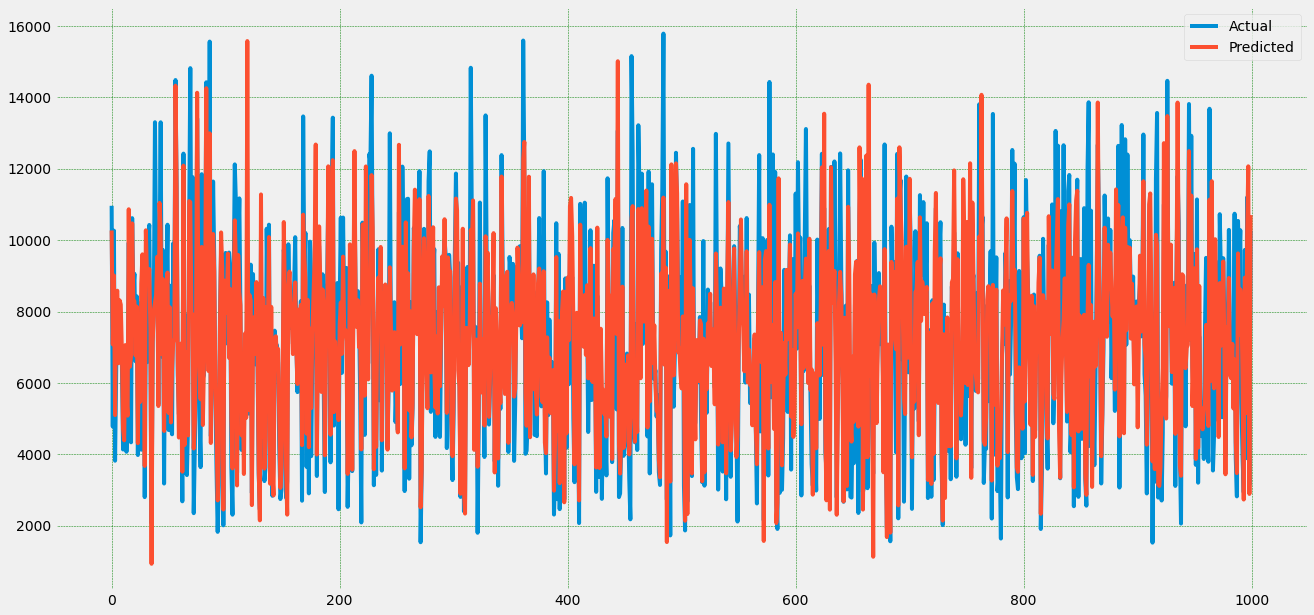

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

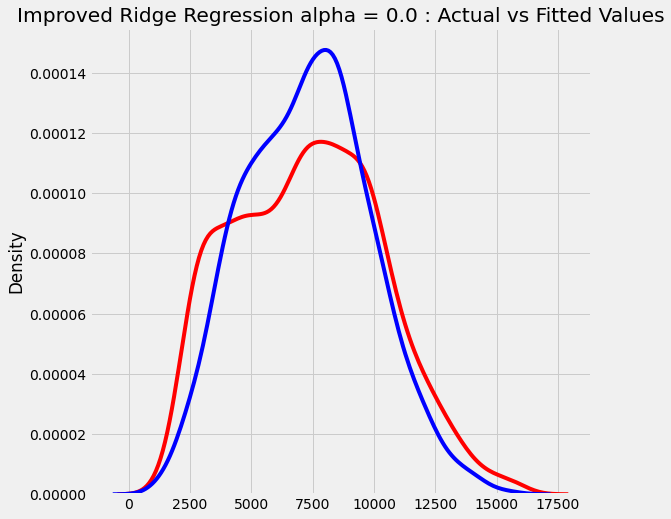

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved Ridge Regression alpha = 0.0 : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rr2.score(test_features,test_labels)

0.7451107864262654

# Model Development with Support Vector Regression


In [ ]:
from sklearn.svm import LinearSVR
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
svm1 = LinearSVR( C=10)
svm1.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
svm1_duration = t1-t0
print(svm1_duration)

0.1111440658569336


In [ ]:
# Use the forest's predict method on the test data
predictions = svm1.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for SVM model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1062.3640613231207 Kbps
Mean Squared Error: 2560671.8270474887 Kbps
Root Mean Squared Error: 1600.2099321799901 Kbps
Mean Absolute Percentage Error: 0.15297600533136335 %
R2 score for SVM model is 71.77 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for support vector machine is', "{:.2f}".format(r2*100) ,'%')

R2 score for support vector machine is 71.77 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10843.99622497  6402.12047314  9292.67927033 ...  7739.29037641
  8214.30448012  6079.39565919]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10843.996225
1      4776.520020   6402.120473
2     10267.730470   9292.679270
3      3821.270020   4549.385856
4      6392.120117   6962.607544
...            ...           ...
2739   8907.709961  12991.413185
2740   3370.600098   3612.819901
2741   7116.709961   7739.290376
2742   7094.962703   8214.304480
2743   6210.560059   6079.395659

[2744 rows x 2 columns]

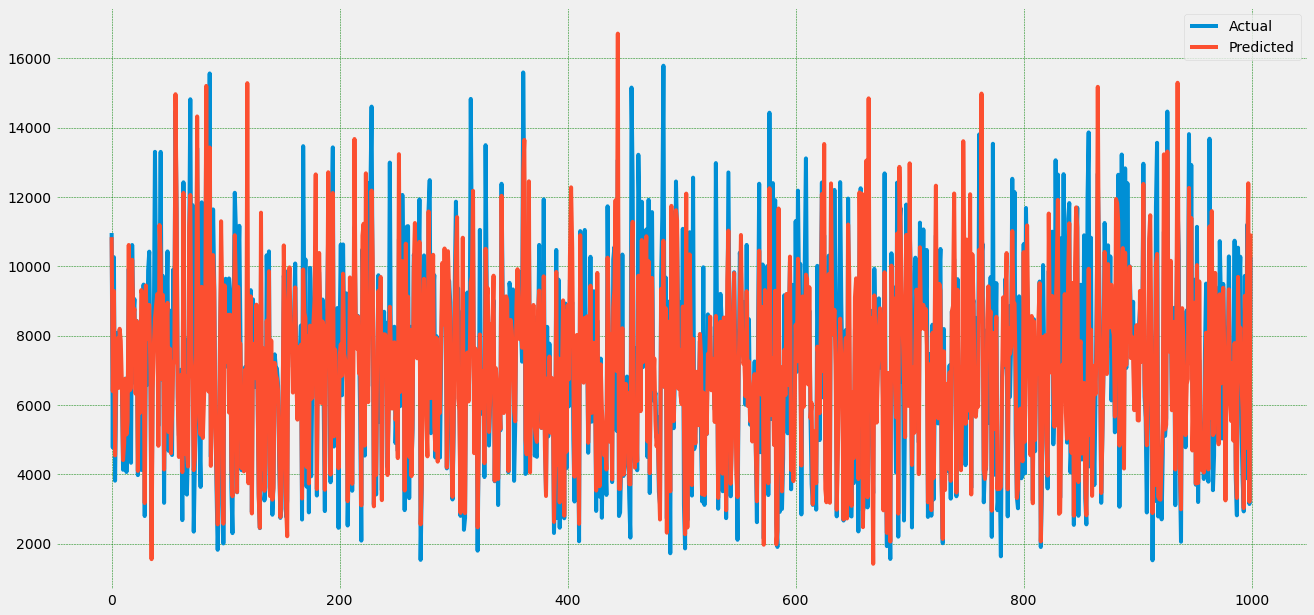

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

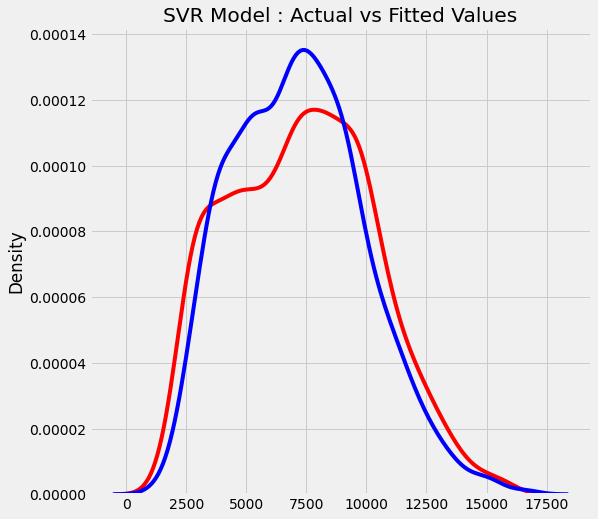

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('SVR Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
svm1.score(test_features,test_labels)

0.7176751673837032

# Model Development with Gradient Boost


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting1 = GradientBoostingRegressor(n_estimators=400, random_state=42,learning_rate = 1)
gboosting1.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
gboosting1_duration = t1-t0
print(gboosting1_duration)


17.691054105758667


In [ ]:
predictions = gboosting1.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 959.7801289636765 Kbps
Mean Squared Error: 2005761.046889265 Kbps
Root Mean Squared Error: 1416.248935353268 Kbps
Mean Absolute Percentage Error: 0.15256158106417128 %
R2 score for gBoosting model is 77.89 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting is', "{:.2f}".format(r2*100) ,'%')

R2 score for gBoosting is 77.89 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10488.15446852  6067.84636152  9423.50051403 ...  7817.89581336
  7163.44192197  5863.85788586]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10488.154469
1      4776.520020   6067.846362
2     10267.730470   9423.500514
3      3821.270020   4326.670358
4      6392.120117   6035.361635
...            ...           ...
2739   8907.709961   8951.097632
2740   3370.600098   5320.119500
2741   7116.709961   7817.895813
2742   7094.962703   7163.441922
2743   6210.560059   5863.857886

[2744 rows x 2 columns]

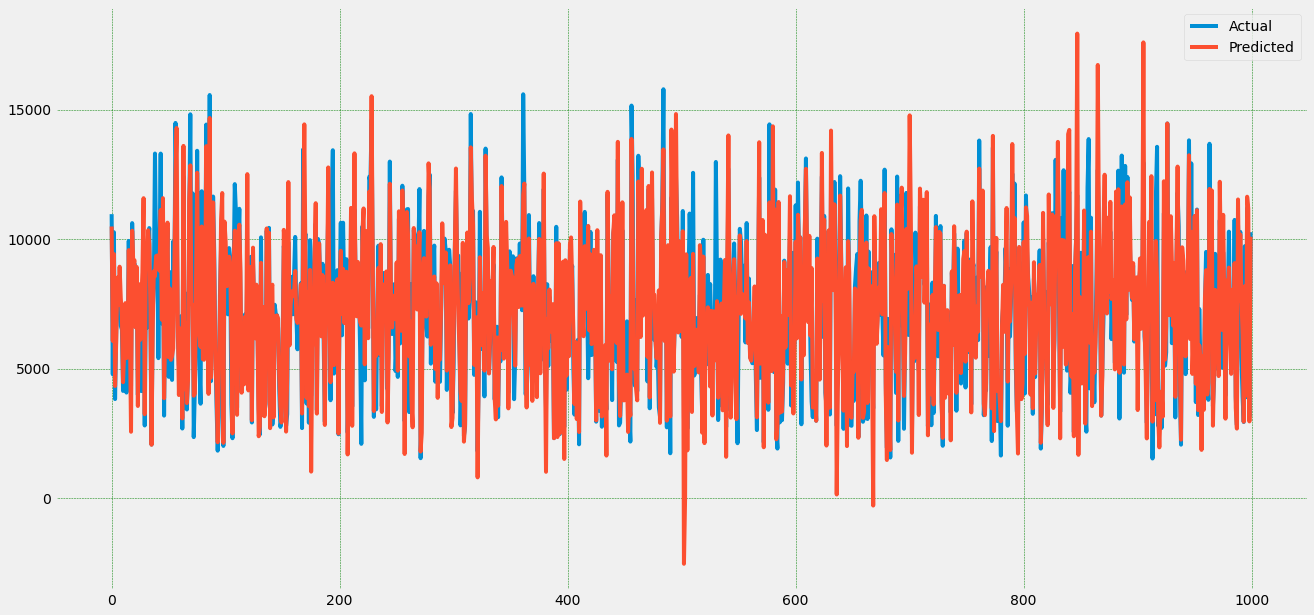

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

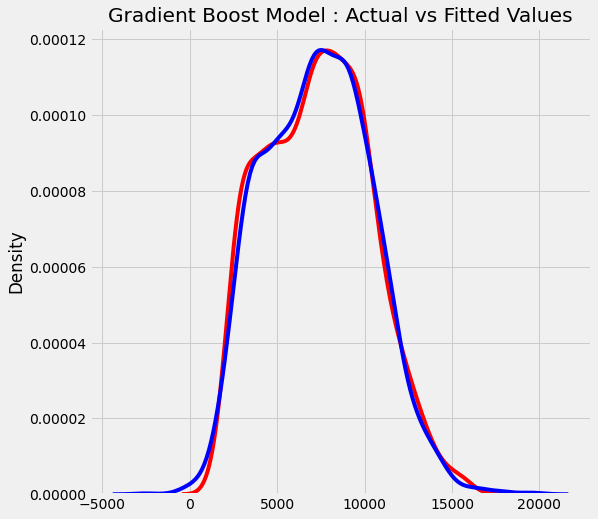

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Gradient Boost Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
gboosting1.score(test_features,test_labels)

0.7788564134420032

# Gradient Boosting Hyperparameters Tuning

In [ ]:
gboosting1.get_params(deep=True)

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params =  {
    "n_estimators": [1, 100, 200],
    "max_leaf_nodes": [2, 50, 100],
    'min_impurity_decrease' : [0.0, 10,  50, 100],
    "learning_rate": (0.01, 0.1, 0.5,0.8),
    'max_depth': [2,10,15],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'loss': ['ls', 'lad','huber','quantile','absolute_error','squared_error'],
    # 'criterion': ['friedman_mse', 'squared_error', 'mse'],
    'min_samples_split': [0.01,0.5,1],
    'min_samples_leaf': [,0.1 , 0.5 , 1],
    'min_weight_fraction_leaf': [0.0 , 0.5],
    'subsample': [0.1, 0.5,1]
}

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=1, return_train_score=True)
gridsearch.fit(train_features, train_labels)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")
# Evaluate the model using the test data
predictions = model.predict(test_features)
mse = mean_squared_error(test_labels, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_labels, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Downlink Throughput Prediction')
# overlay the regression line
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)
plt.plot(test_labels,p(test_labels), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'max_depth': 15, 'max_leaf_nodes': 50, 'min_impurity_decrease': 50, 'min_samples_leaf': 1, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'subsample': 1} 

GradientBoostingRegressor(max_depth=15, max_leaf_nodes=50,
                          min_impurity_decrease=50, min_samples_split=0.01,
                          n_estimators=200, subsample=1) 



NameError: ignored

# Gradient Boost with Hyperparameters Tuning


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting2 = GradientBoostingRegressor(n_estimators=800, random_state=42,learning_rate = 0.1)
gboosting2.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
gboosting2_duration = t1-t0
print(gboosting2_duration)


34.54877495765686


In [ ]:
predictions = gboosting2.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 688.0593726658107 Kbps
Mean Squared Error: 1106050.4172789978 Kbps
Root Mean Squared Error: 1051.689315947917 Kbps
Mean Absolute Percentage Error: 0.10413596363805265 %
R2 score for gBoosting model is 87.81 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting is', "{:.2f}".format(r2*100) ,'%')

R2 score for gBoosting is 87.81 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [10512.84920341  6212.83972498  9644.49147138 ...  7679.47874412
  7825.18873947  6108.40692171]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350  10512.849203
1      4776.520020   6212.839725
2     10267.730470   9644.491471
3      3821.270020   4040.410033
4      6392.120117   6660.411631
...            ...           ...
2739   8907.709961   9381.258957
2740   3370.600098   3869.328086
2741   7116.709961   7679.478744
2742   7094.962703   7825.188739
2743   6210.560059   6108.406922

[2744 rows x 2 columns]

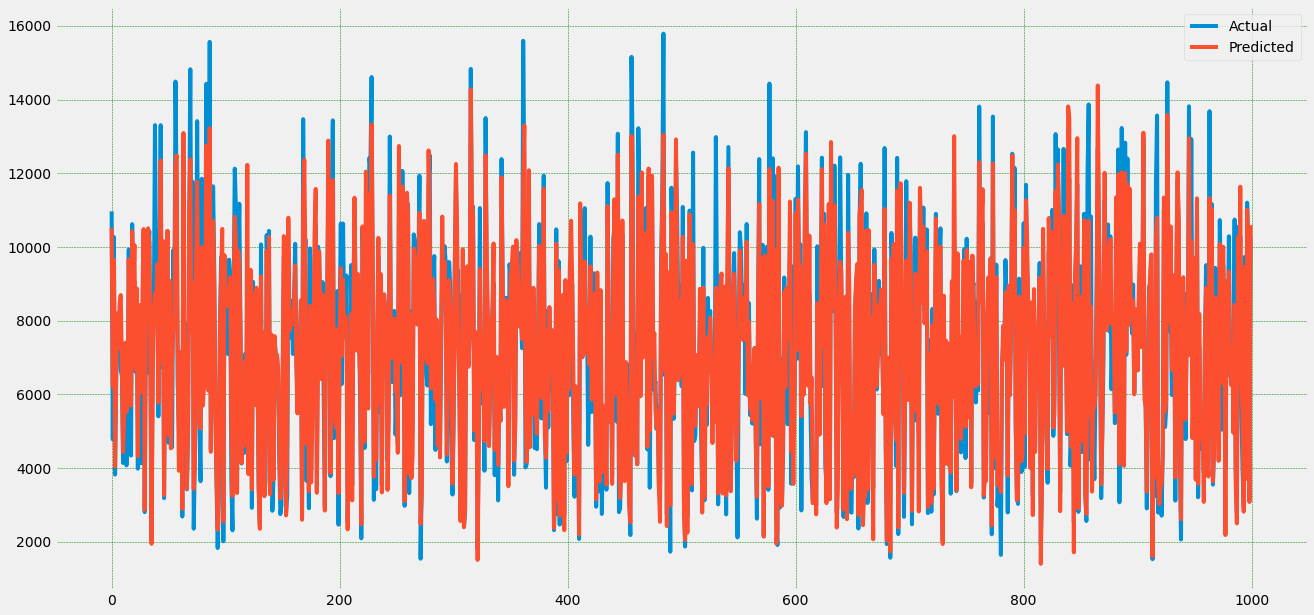

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

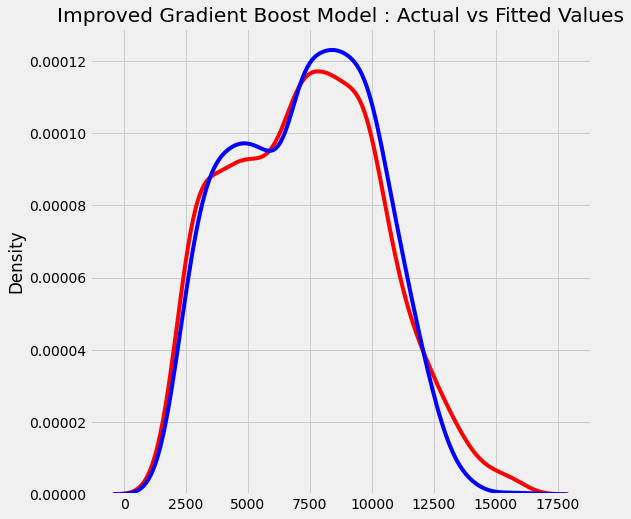

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved Gradient Boost Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
gboosting2.score(test_features,test_labels)

0.8780532922551316

# Model Development with K-Nearest Neighbor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn1 = KNeighborsRegressor(n_neighbors=11 , weights='distance')
knn1.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
knn1_duration = t1-t0
print(knn1_duration)

0.001895904541015625


In [ ]:
predictions = knn1.predict(test_features)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for KNN model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1259.0513558551559 Kbps
Mean Squared Error: 2852893.204972212 Kbps
Root Mean Squared Error: 1689.050977612047 Kbps
Mean Absolute Percentage Error: 0.21510793239311857 %
R2 score for KNN model is 68.55 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [ 9568.12741795  8656.96056326 10122.21153603 ...  6060.79143781
  7250.73284542  5755.20786744]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350   9568.127418
1      4776.520020   8656.960563
2     10267.730470  10122.211536
3      3821.270020   3969.363172
4      6392.120117   5580.890563
...            ...           ...
2739   8907.709961   9157.669049
2740   3370.600098   4611.387847
2741   7116.709961   6060.791438
2742   7094.962703   7250.732845
2743   6210.560059   5755.207867

[2744 rows x 2 columns]

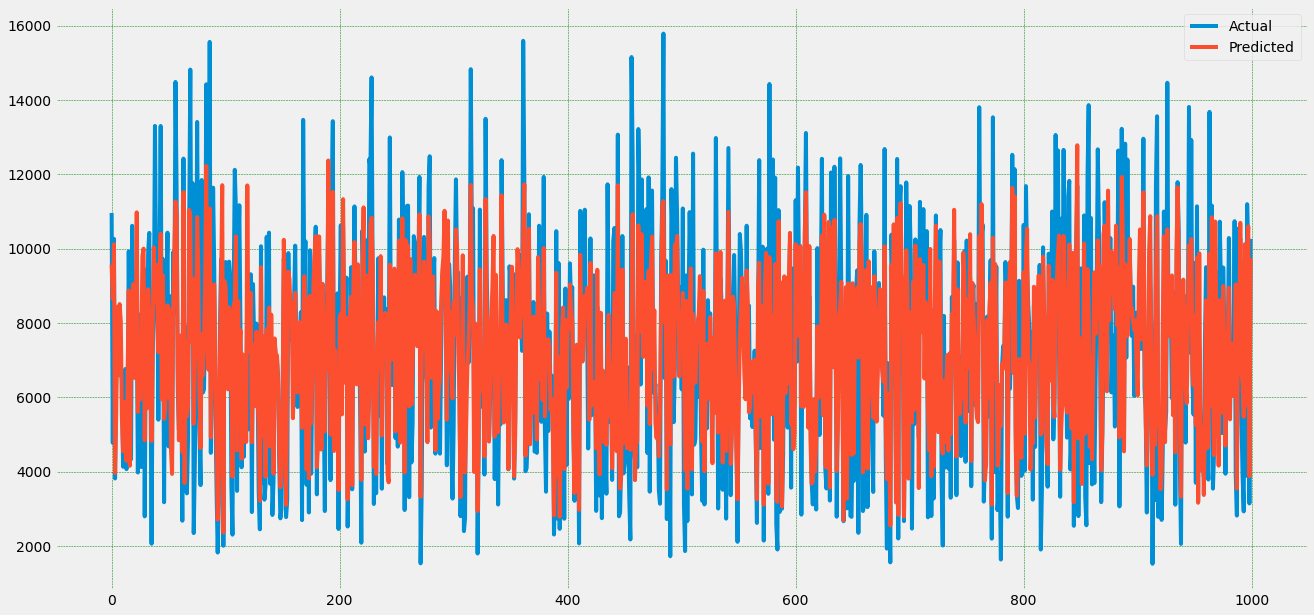

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

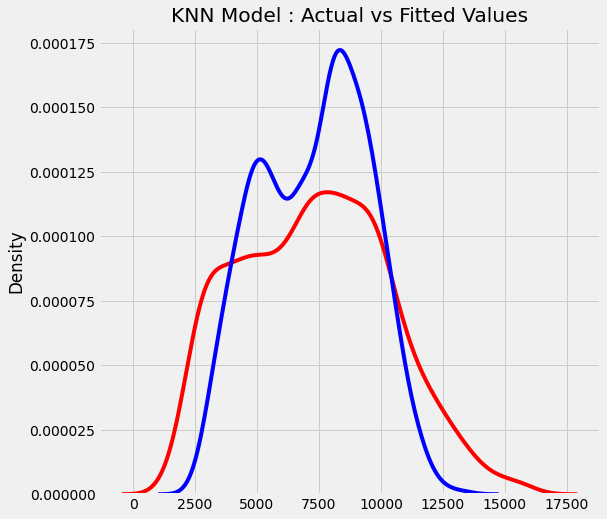

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('KNN Model : Actual vs Fitted Values')


plt.show()
plt.close()

# KNN Hyperparameters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(train_features, train_labels)

In [ ]:
# Get the results
print(g_res.best_score_)
print(g_res.best_estimator_)
print(g_res.best_params_)

#  K-Nearest Neighbor with Hyperparameters Tuning

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn2 = KNeighborsRegressor(n_neighbors=15 , weights='distance',metric = 'manhattan')
knn2.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
knn2_duration = t1-t0
print(knn2_duration)

0.001013040542602539


In [ ]:
predictions = knn2.predict(test_features)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for KNN model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1184.4000062750056 Kbps
Mean Squared Error: 2576907.269011561 Kbps
Root Mean Squared Error: 1605.2748266298704 Kbps
Mean Absolute Percentage Error: 0.19871844282861398 %
R2 score for KNN model is 71.59 %


In [ ]:
print('actuals', test_labels)

actuals [10964.36035   4776.52002  10267.73047  ...  7116.709961  7094.962703
  6210.560059]


In [ ]:
print('actuals', predictions)

actuals [ 9965.62290197  6544.10765182 10074.2921218  ...  6365.86439063
  7676.17358632  5538.00144944]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0     10964.360350   9965.622902
1      4776.520020   6544.107652
2     10267.730470  10074.292122
3      3821.270020   3871.420542
4      6392.120117   6427.650263
...            ...           ...
2739   8907.709961   8490.843475
2740   3370.600098   4719.319950
2741   7116.709961   6365.864391
2742   7094.962703   7676.173586
2743   6210.560059   5538.001449

[2744 rows x 2 columns]

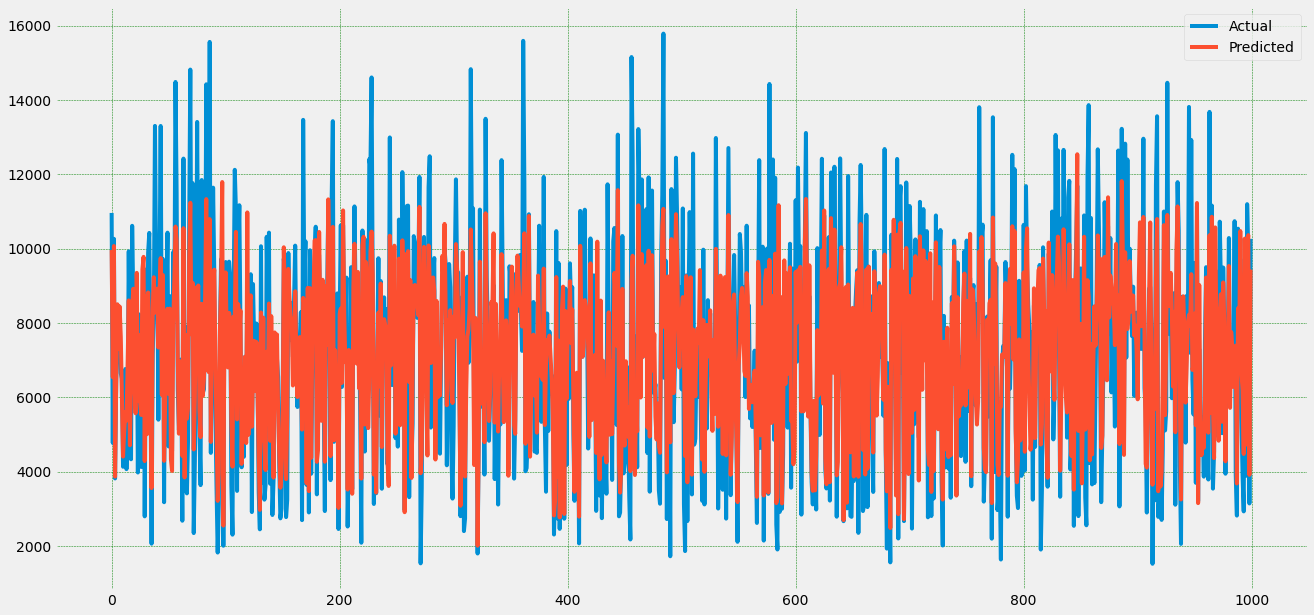

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

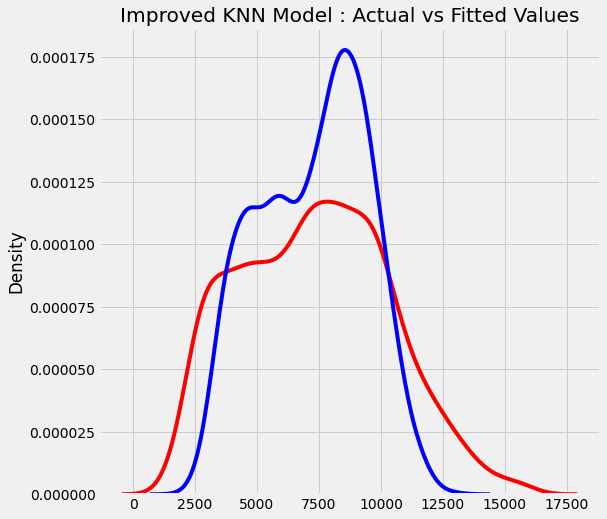

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved KNN Model : Actual vs Fitted Values')


plt.show()
plt.close()

# Evaluate

In [ ]:
model_eval = pd.DataFrame(columns=['MAE (kbps)','RMSE (kbps)','MAPE (%)', 'R2 Score','Duration (ms)',], 
                     index=['Random Forest with 400 Trees',
                            'Random Forest with Hyperparameters Tuning',
                            'Extra Tree with 400 Trees',
                            'AdaBoost',
                            'AdaBoost with Hyperparameters Tuning',
                            'Gradient Boost',
                            'Gradient Boost with Hyperparameters Tuning',
                             'Linear Regression',
                            'Ridge Regression alpha=0.01',
                            'Ridge Regression alpha=0.0',
                            'SVR',
                           'KNN',
                        'KNN with Hyperparameters Tuning' ])

from sklearn import metrics
from sklearn.metrics import mean_squared_error

model_eval.loc['Random Forest with 400 Trees', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rf.predict(test_features))
model_eval.loc['Random Forest with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rf1.predict(test_features))
model_eval.loc['Extra Tree with 400 Trees', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=reg.predict(test_features))
model_eval.loc['AdaBoost', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=AdaBoost1.predict(test_features))
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=AdaBoost2.predict(test_features))
model_eval.loc['Gradient Boost', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=gboosting1.predict(test_features))
model_eval.loc['Gradient Boost with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=gboosting2.predict(test_features))
model_eval.loc['Linear Regression', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=lin_reg.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.01','MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rr1.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.0','MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rr2.predict(test_features))
model_eval.loc['SVR', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=svm1.predict(test_features))
model_eval.loc['KNN', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=knn1.predict(test_features))
model_eval.loc['KNN with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=knn2.predict(test_features))

model_eval.loc['Random Forest with 400 Trees', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rf.predict(test_features))
model_eval.loc['Random Forest with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rf1.predict(test_features))
model_eval.loc['Extra Tree with 400 Trees', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=reg.predict(test_features))
model_eval.loc['AdaBoost', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=AdaBoost1.predict(test_features))
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=AdaBoost2.predict(test_features))
model_eval.loc['Gradient Boost', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=gboosting1.predict(test_features))
model_eval.loc['Gradient Boost with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=gboosting2.predict(test_features))
model_eval.loc['Linear Regression', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=lin_reg.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.01','MAPE (%)'] =metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rr1.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.0','MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rr2.predict(test_features))
model_eval.loc['SVR', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=svm1.predict(test_features))
model_eval.loc['KNN', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=knn1.predict(test_features))
model_eval.loc['KNN with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=knn2.predict(test_features))




model_eval.loc['Random Forest with 400 Trees', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rf.predict(test_features)))
model_eval.loc['Random Forest with Hyperparameters Tuning', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rf1.predict(test_features)))
model_eval.loc['Extra Tree with 400 Trees', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=reg.predict(test_features)))
model_eval.loc['AdaBoost', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=AdaBoost1.predict(test_features)))
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=AdaBoost2.predict(test_features)))
model_eval.loc['Gradient Boost', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=gboosting1.predict(test_features)))
model_eval.loc['Gradient Boost with Hyperparameters Tuning', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=gboosting2.predict(test_features)))
model_eval.loc['Linear Regression', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=lin_reg.predict(test_features)))
model_eval.loc['Ridge Regression alpha=0.01', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rr1.predict(test_features)))
model_eval.loc['Ridge Regression alpha=0.0','RMSE (kbps)'] =  np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rr2.predict(test_features)))
model_eval.loc['SVR', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=svm1.predict(test_features)))
model_eval.loc['KNN', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=knn1.predict(test_features)))
model_eval.loc['KNN with Hyperparameters Tuning','RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=knn2.predict(test_features)))

model_eval.loc['Random Forest with 400 Trees', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rf.predict(test_features)).round(3)
model_eval.loc['Random Forest with Hyperparameters Tuning', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rf1.predict(test_features)).round(3)
model_eval.loc['Extra Tree with 400 Trees', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=reg.predict(test_features)).round(3)
model_eval.loc['AdaBoost', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=AdaBoost1.predict(test_features)).round(3)
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=AdaBoost2.predict(test_features)).round(3)
model_eval.loc['Gradient Boost','R2 Score'] = r2_score(y_true=test_labels, y_pred=gboosting1.predict(test_features)).round(3)
model_eval.loc['Gradient Boost with Hyperparameters Tuning','R2 Score'] = r2_score(y_true=test_labels, y_pred=gboosting2.predict(test_features)).round(3)
model_eval.loc['Linear Regression', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=lin_reg.predict(test_features)).round(3)
model_eval.loc['Ridge Regression alpha=0.01', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rr1.predict(test_features)).round(3)
model_eval.loc['Ridge Regression alpha=0.0', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rr2.predict(test_features)).round(3)
model_eval.loc['SVR','R2 Score'] = r2_score(y_true=test_labels, y_pred=svm1.predict(test_features)).round(3)
model_eval.loc['KNN', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=knn1.predict(test_features)).round(3)
model_eval.loc['KNN with Hyperparameters Tuning', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=knn2.predict(test_features)).round(3)

model_eval.loc['Random Forest with 400 Trees', 'Duration (ms)'] =rf_duration*1000
model_eval.loc['Random Forest with Hyperparameters Tuning', 'Duration (ms)'] =rf1_duration*1000
model_eval.loc['Extra Tree with 400 Trees', 'Duration (ms)'] = extratree_duration*1000
model_eval.loc['AdaBoost', 'Duration (ms)'] = AdaBoost1_duration*1000
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'Duration (ms)'] = AdaBoost2_duration*1000
model_eval.loc['Gradient Boost','Duration (ms)'] = gboosting1_duration*1000
model_eval.loc['Gradient Boost with Hyperparameters Tuning','Duration (ms)'] = gboosting2_duration*1000
model_eval.loc['Linear Regression', 'Duration (ms)'] = lin_reg_duration*1000
model_eval.loc['Ridge Regression alpha=0.01', 'Duration (ms)'] = rr1_duration*1000
model_eval.loc['Ridge Regression alpha=0.0', 'Duration (ms)'] = rr2_duration*1000
model_eval.loc['SVR','Duration (ms)'] = svm1_duration*1000
model_eval.loc['KNN', 'Duration (ms)'] = knn1_duration*1000
model_eval.loc['KNN with Hyperparameters Tuning', 'Duration (ms)'] = knn2_duration*1000



model_eval##

MAE (kbps)  RMSE (kbps)  \
Random Forest with 400 Trees                 796.325831  1166.951854   
Random Forest with Hyperparameters Tuning    727.109619  1129.916712   
Extra Tree with 400 Trees                    757.949743  1152.906615   
AdaBoost                                    1499.993524  1798.443428   
AdaBoost with Hyperparameters Tuning        1137.222587  1532.667636   
Gradient Boost                               959.780129  1416.248935   
Gradient Boost with Hyperparameters Tuning   688.059373  1051.689316   
Linear Regression                           1097.478476  1520.471033   
Ridge Regression alpha=0.01                 1097.478368  1520.471152   
Ridge Regression alpha=0.0                  1097.478476  1520.471033   
SVR                                         1062.364061  1600.209932   
KNN                                         1259.051356  1689.050978   
KNN with Hyperparameters Tuning             1184.400006  1605.274827   

                                            MAPE (%) R2 Score Duration (ms)  
Random Forest with 400 Trees                0.125226     0.85  15127.974033  
Random Forest with Hyperparameters Tuning   0.109981    0.859  72025.465012  
Extra Tree with 400 Trees                   0.116066    0.853  14100.729227  
AdaBoost                                    0.279083    0.643   6453.752041  
AdaBoost with Hyperparameters Tuning        0.191489    0.741    2538.95402  
Gradient Boost                              0.152562    0.779  17691.054106  
Gradient Boost with Hyperparameters Tuning  0.104136    0.878  34548.774958  
Linear Regression                           0.172588    0.745     31.755924  
Ridge Regression alpha=0.01                 0.172588    0.745      6.968975  
Ridge Regression alpha=0.0                  0.172588    0.745     22.345066  
SVR                                         0.152976    0.718    111.144066  
KNN                                         0.215108    0.685      1.895905  
KNN with Hyperparameters Tuning             0.198718    0.716      1.013041

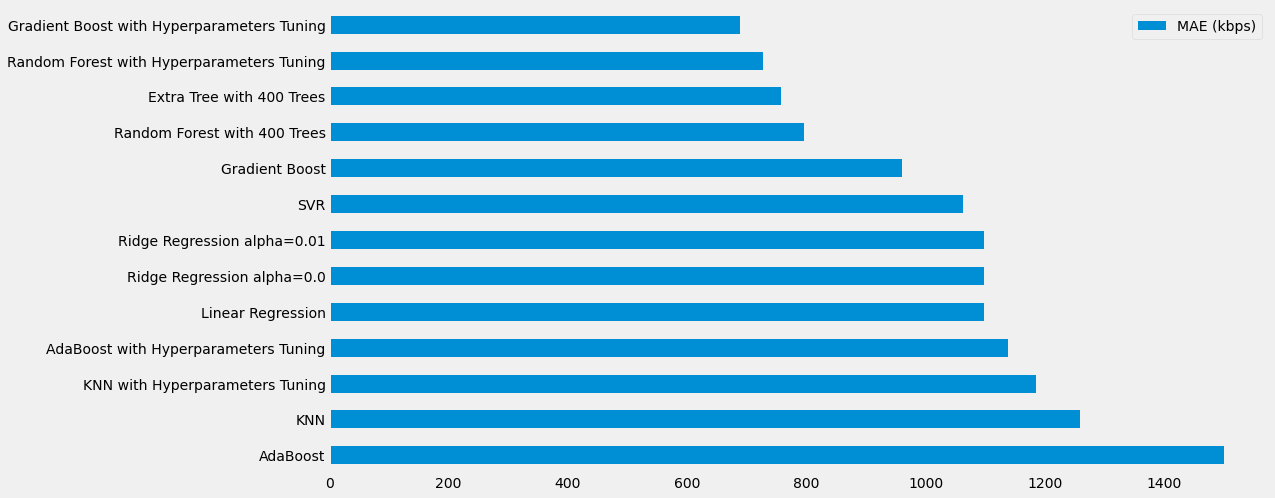

In [ ]:
fig, ax = plt.subplots()
model_eval[['MAE (kbps)']].sort_values(by='MAE (kbps)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

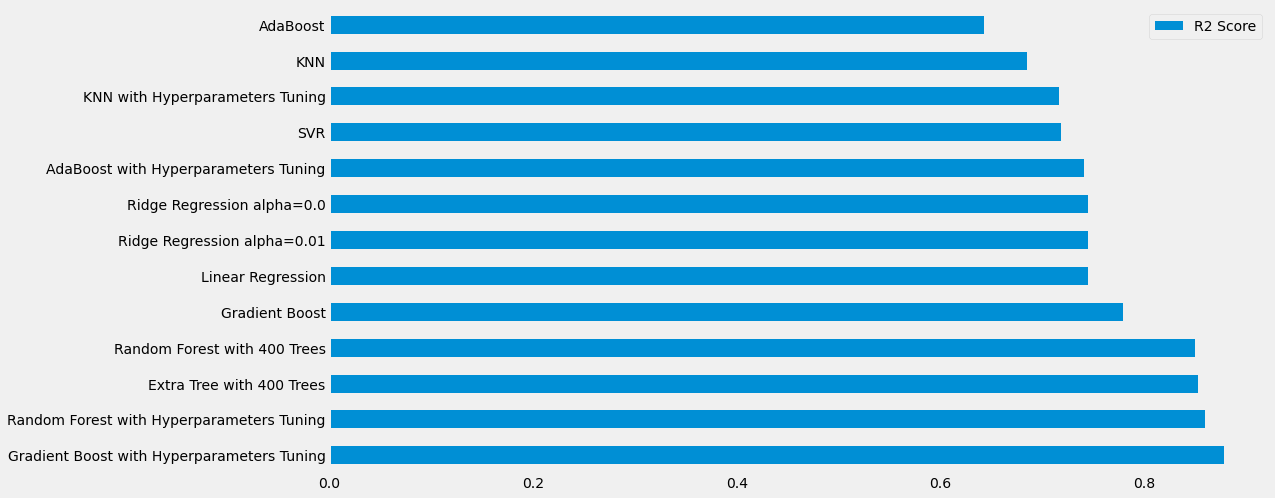

In [ ]:
fig, ax = plt.subplots()
model_eval[['R2 Score']].sort_values(by='R2 Score', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

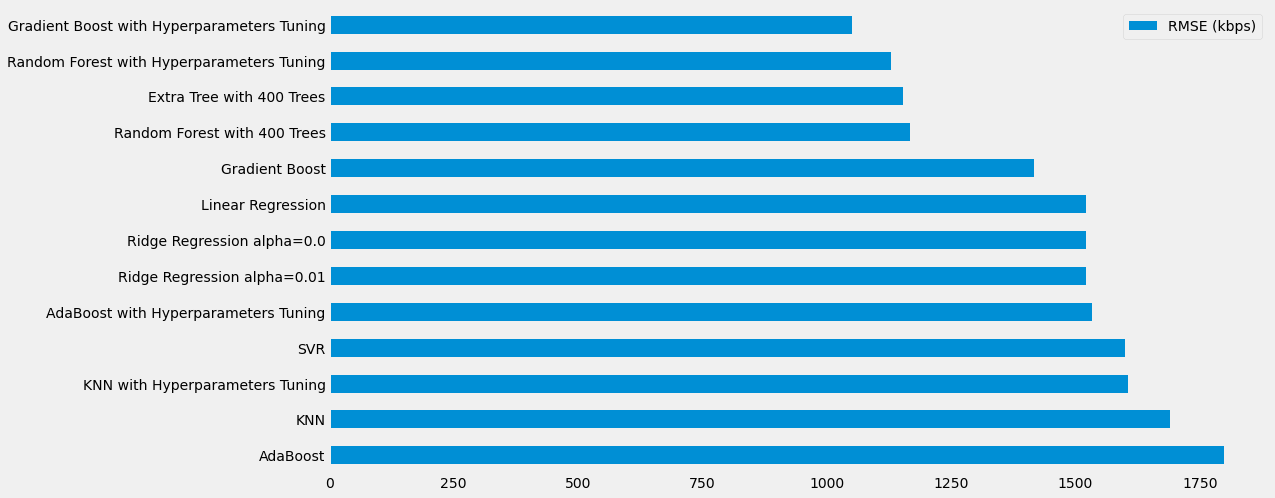

In [ ]:
fig, ax = plt.subplots()
model_eval[['RMSE (kbps)']].sort_values(by='RMSE (kbps)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

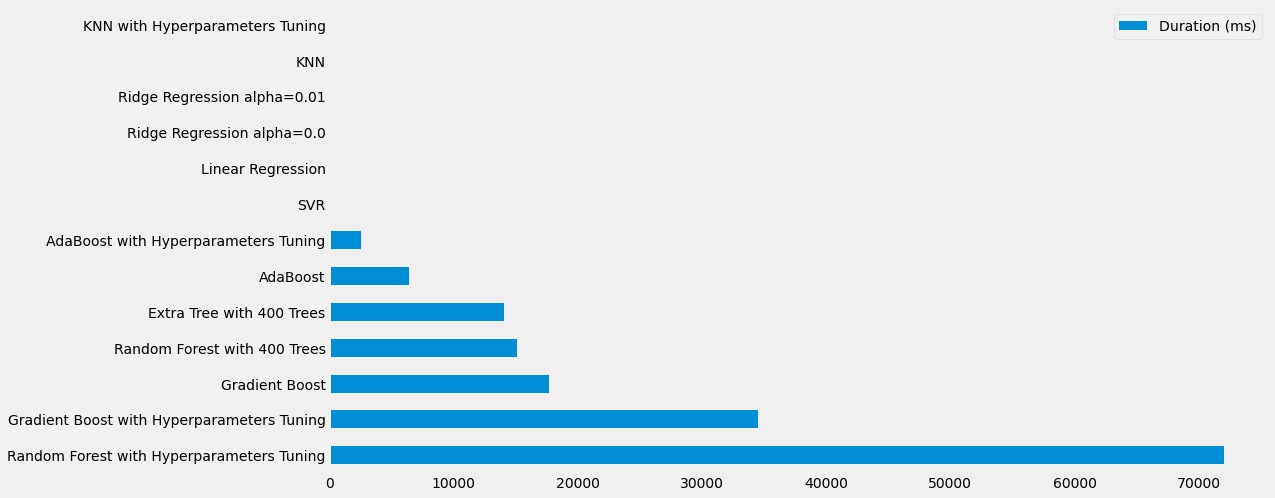

In [ ]:
fig, ax = plt.subplots()
model_eval[['Duration (ms)']].sort_values(by='Duration (ms)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

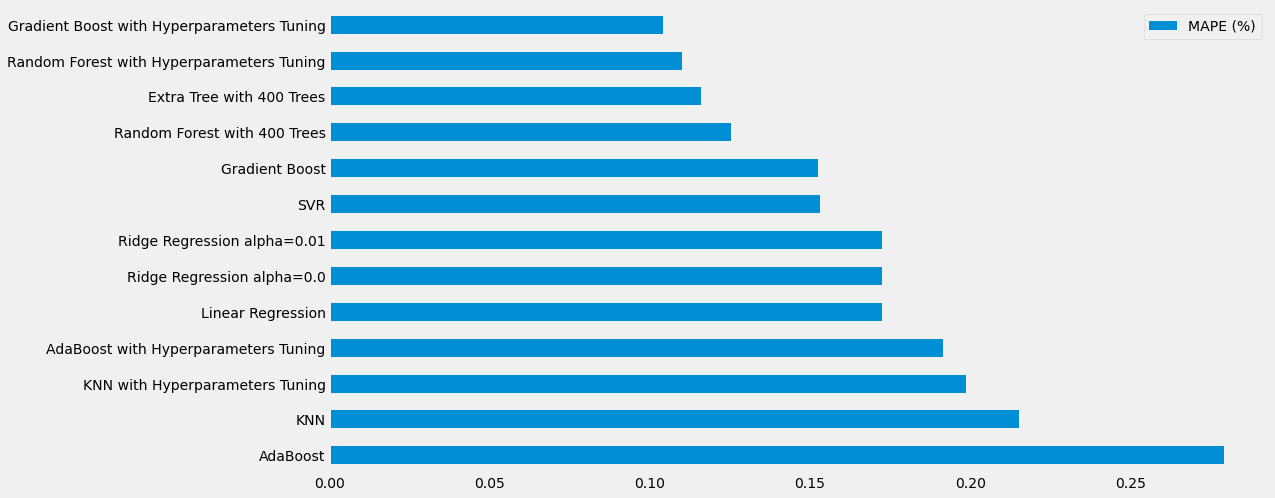

In [ ]:
fig, ax = plt.subplots()
model_eval[['MAPE (%)']].sort_values(by='MAPE (%)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

# ANN

In [ ]:
import pickle
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import random
import random
import tensorflow.keras.utils
import tensorflow.keras.models as models
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten,Layer
import tensorflow.keras.layers 
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import tensorflow as tf
import keras
import tensorflow.keras.layers as tfl
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

ANN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = models.Sequential()
# model.add(BatchNormalization())
model.add(Dense(2048,input_dim=11,activation='LeakyReLU'))

model.add(Dense(1024,activation='LeakyReLU',name="dense1"))
model.add(Dropout(0.5,name="drop1"))



model.add(Dense(512,activation='LeakyReLU',name="dense2"))
model.add(Dropout(0.2,name="drop2"))

model.add(Dense(256,activation='LeakyReLU',name="dense3"))
model.add(Dropout(0.2,name="drop3"))

model.add(Dense(128,activation='LeakyReLU',name="dense4"))
model.add(Dropout(0.2,name="drop4"))

model.add(Dense(1,activation='LeakyReLU', name="dense5"))


model.compile(loss ='mse',optimizer='adam',metrics = ['mae'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2048)              24576     
                                                                 
 dense1 (Dense)              (None, 1024)              2098176   
                                                                 
 drop1 (Dropout)             (None, 1024)              0         
                                                                 
 dense2 (Dense)              (None, 512)               524800    
                                                                 
 drop2 (Dropout)             (None, 512)               0         
                                                                 
 dense3 (Dense)              (None, 256)               131328    
                                                                 
 drop3 (Dropout)             (None, 256)              

In [ ]:
from keras.callbacks import ModelCheckpoint
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
monitors = ModelCheckpoint(filepath='monitor.hdf5',verbose=1,save_best_only=True)
history = model.fit(train_features,train_labels,validation_split=0.1,callbacks=[monitors],verbose=2,epochs = 100,shuffle=True,batch_size=64)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
model_duration = t1-t0

Epoch 1/100

Epoch 1: val_loss improved from inf to 1893973.00000, saving model to monitor.hdf5
125/125 - 7s - loss: 1920359.5000 - mae: 979.3535 - val_loss: 1893973.0000 - val_mae: 953.0223 - 7s/epoch - 57ms/step
Epoch 2/100

Epoch 2: val_loss improved from 1893973.00000 to 1771557.50000, saving model to monitor.hdf5
125/125 - 7s - loss: 1927236.7500 - mae: 987.5250 - val_loss: 1771557.5000 - val_mae: 873.7534 - 7s/epoch - 54ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1771557.50000 to 1656043.37500, saving model to monitor.hdf5
125/125 - 7s - loss: 2056800.0000 - mae: 1022.4626 - val_loss: 1656043.3750 - val_mae: 827.7374 - 7s/epoch - 54ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1656043.37500 to 1640251.50000, saving model to monitor.hdf5
125/125 - 7s - loss: 1956836.2500 - mae: 986.9329 - val_loss: 1640251.5000 - val_mae: 841.5297 - 7s/epoch - 59ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1640251.50000 to 1632339.50000, saving model to monitor.hdf5
125/125

In [ ]:
print('Model Duration is : ',"{:.2f}".format(model_duration/60), 'Minutes')

Model Duration is :  12.37 Minutes


In [ ]:
model.evaluate(test_features,test_labels)

93/93 [==============================] - 1s 9ms/step - loss: 1548111.7500 - mae: 835.6256


[1548111.75, 835.6256103515625]

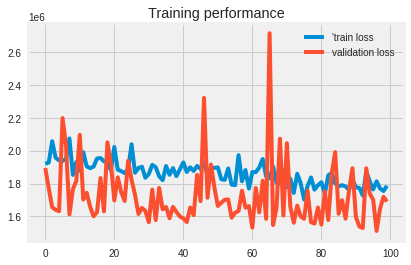

In [ ]:
plt.figure()
plt.title('Training performance')
plt.plot(range(len(history.history["loss"])),history.history["loss"],label ="'train loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label ="validation loss")
plt.legend()

In [ ]:
predictions = model.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

Mean Absolute Error: 835.6259718741361 Kbps
Mean Squared Error: 1548112.088243971 Kbps
Root Mean Squared Error: 1244.2315251768744 Kbps


In [ ]:
print('actuals', test_labels)

actuals [2241.050049 2541.320068 3701.48999  ... 9460.549805 9299.950195
 4676.470215]


In [ ]:
print('predictions', predictions)

predictions [[2749.9583]
 [5314.819 ]
 [3580.961 ]
 ...
 [9508.133 ]
 [9339.974 ]
 [4153.35  ]]


In [ ]:
print("predictions shape:", predictions.shape)

predictions shape: (2948, 1)


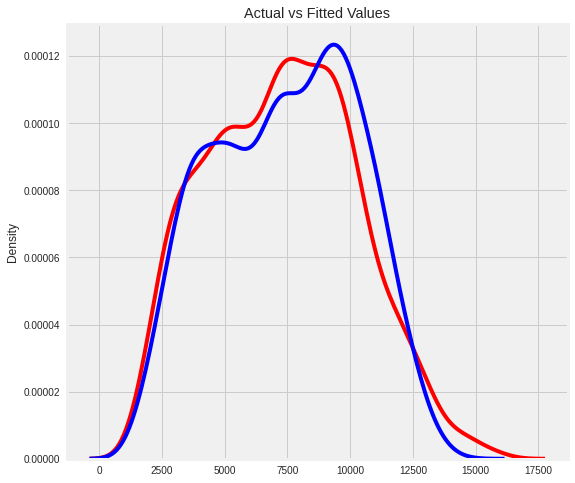

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()